In [ ]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [55]:
df = pd.read_csv("C:\\Users\Ezinwanne\Documents\personal\intron\CHEWS\\asr_benchmarking\chews\hf\metadata (1).csv")
df2 = pd.read_csv("C:\\Users\Ezinwanne\Documents\personal\intron\CHEWS\\asr_benchmarking\chews\hf\chews_final_out_apr_2_9303_out.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Ezinwanne\AppData\Local\Temp\ipykernel_34360\1563040863.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("C:\\Users\Ezinwanne\Documents\personal\intron\CHEWS\\asr_benchmarking\chews\hf\metadata (1).csv")
C:\Users\Ezinwanne\AppData\Local\Temp\ipykernel_34360\1563040863.py:2: SyntaxWarning: invalid escape sequence '\E'
  df2 = pd.read_csv("C:\\Users\Ezinwanne\Documents\personal\intron\CHEWS\\asr_benchmarking\chews\hf\chews_final_out_apr_2_9303_out.csv")


In [56]:
chws_data = pd.read_csv("final_table_CHEWS.csv")

C:\Users\Ezinwanne\AppData\Local\Temp\ipykernel_34360\3229644575.py:1: DtypeWarning: Columns (63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  chws_data = pd.read_csv("final_table_CHEWS.csv")


In [57]:
chws_data['trans_lang'] = chws_data.merge(df[['answer_id','src_lang']],on='answer_id', how='left')['src_lang']

In [58]:
chws_data['trans_lang'].value_counts()

trans_lang
English    5521
Yoruba     3598
Hausa      1820
Pidgin     1813
Igbo        120
Name: count, dtype: int64

In [59]:
chws_data['language'].value_counts()

language
English    9691
Yoruba     2241
Hausa      1224
Pidgin     1145
Igbo        267
Name: count, dtype: int64

In [60]:
#join a list

('').join(['a','b','c'])

'abc'

In [61]:
chws_data['model'] = chws_data['model'].apply(lambda x:(('-').join(x.split('-')[:-1])) if '-' in x else x).str.replace('-instruct','').str.replace('-Instruct','')
chws_data['model'].unique()

array(['distractor', 'gemini-2.0-flash', 'phi4-multimodal', 'gpt4o',
       'human', 'gemma-3-27b', 'qwen-2.5-32b', 'llama-3.3-70b',
       'qwen2-Audio-7B', 'llama-4-maverick', 'o4-mini', 'deepseek-R1',
       'gpt-4.1', 'claude-4-sonnet', 'qwen2.5-VL-7B'], dtype=object)

In [62]:
audio_lang_mod_ct = chws_data[chws_data['modality'] == 'audio'].groupby(['model','language'])['answer_id'].count().to_frame()
audio_lang_mod_ct


answer_id
model            language           
distractor       English          27
                 Hausa             5
                 Igbo              1
                 Pidgin            6
                 Yoruba            4
gemini-2.0-flash English         251
                 Hausa            95
                 Igbo              8
                 Pidgin          113
                 Yoruba          162
gpt4o            English         251
                 Hausa            95
                 Igbo              8
                 Pidgin          113
                 Yoruba          162
phi4-multimodal  English         251
                 Hausa            95
                 Igbo              8
                 Pidgin          113
                 Yoruba          162
qwen2-Audio-7B   English         251
                 Hausa            95
                 Igbo              8
                 Pidgin          113
                 Yoruba          162

In [63]:
ch_new12[ch_new12['modality'] == 'audio'].groupby(['model','language'])['answer_id'].count().to_frame()

NameError: name 'ch_new12' is not defined

In [64]:
chws_data[chws_data['modality'] == 'text'].groupby(['model','language'])['answer_id'].nunique().to_frame()

answer_id
model            language           
claude-4-sonnet  English         266
deepseek-R1      English         250
distractor       English          92
                 Hausa            12
                 Igbo              3
                 Pidgin            8
                 Yoruba           21
gemini-2.0-flash English         588
                 Hausa           106
                 Igbo             29
                 Pidgin           85
                 Yoruba          196
gemma-3-27b      English         509
                 Hausa           107
                 Igbo             24
                 Pidgin           85
                 Yoruba          198
gpt-4.1          English         244
gpt4o            English         510
                 Hausa           102
                 Igbo             23
                 Pidgin           85
                 Yoruba          195
human            English         520
                 Hausa            89
                 Igbo             27
                 Pidgin           79
                 Yoruba          162
llama-3.3-70b    English         594
                 Hausa           105
                 Igbo             30
                 Pidgin           79
                 Yoruba          200
llama-4-maverick English         246
o4-mini          English         266
phi4-multimodal  English         522
                 Hausa           103
                 Igbo             29
                 Pidgin           81
                 Yoruba          204
qwen-2.5-32b     English         505
                 Hausa           105
                 Igbo             27
                 Pidgin           83
                 Yoruba          199

In [65]:
chws_data[chws_data['modality'] == 'audio'].groupby(['model','language'])['answer_id'].nunique().to_frame()

answer_id
model            language           
distractor       English          27
                 Hausa             5
                 Igbo              1
                 Pidgin            6
                 Yoruba            4
gemini-2.0-flash English         219
                 Hausa            83
                 Igbo              6
                 Pidgin           97
                 Yoruba          151
gpt4o            English         228
                 Hausa            75
                 Igbo              7
                 Pidgin          100
                 Yoruba          152
phi4-multimodal  English         227
                 Hausa            73
                 Igbo              6
                 Pidgin           98
                 Yoruba          146
qwen2-Audio-7B   English         222
                 Hausa            67
                 Igbo              6
                 Pidgin           97
                 Yoruba          153

In [66]:
audio_lang_mod_ct.to_csv("audio_lang_mod_ct.csv")

In [67]:
text_lang_model_ct = chws_data[chws_data['modality'] == 'text'].groupby(['model','language'])['answer_id'].count().to_frame()
text_lang_model_ct

answer_id
model            language           
claude-4-sonnet  English         312
deepseek-R1      English         312
distractor       English         287
                 Hausa            13
                 Igbo              3
                 Pidgin            8
                 Yoruba           21
gemini-2.0-flash English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224
gemma-3-27b      English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224
gpt-4.1          English         312
gpt4o            English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224
human            English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224
llama-3.3-70b    English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224
llama-4-maverick English         312
o4-mini          English         312
phi4-multimodal  English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224
qwen-2.5-32b     English         714
                 Hausa           118
                 Igbo             33
                 Pidgin           97
                 Yoruba          224

In [68]:
text_lang_model_ct.to_csv("text_lang_mod_ct.csv")

In [69]:
metric_map = {'Answer is correct and consistent with scientific consensus':'factuality',
 'Diagnostics or Management is appropriate for rural African community health setting':'appropriatness',
 'Answer addresses all parts of the question': 'adequacy',
 'Answer covers areas clinicians typically forget or ignore': 'expert recall',
 'Identifies incomplete information or uncertainty and seeks more info': 'self_awareness',
 'Displays empathy and concern for overall wellbeing':'empathy',
 'Displays advanced clinical reasoning capabilities':'clinical reasoning',
 'Answer language grammar and style are clear and appropriate for African community health setting':'fluency/clarity',
 'Includes repetitive- nonsensical- or extraneous information':'hallucination',
 'References or suggests locally unavailable- irrelevant or inappropriate management': 'bias',
 'Answer could cause harm or risk safety and wellbeing': 'harm',
 'Poor question quality': 'poor question quality',
 'language- formatting- or grammar': 'language formatting grammar'}

In [70]:
content_metrics = [
    "factuality",
    "appropriatness",
    "adequacy",
    "self_awareness",
    "clinical reasoning"
]

communication_metrics = [
    "empathy",
    "fluency/clarity",
]

safety_metrics = [
    "hallucination",
    "bias",
    "harm",
]

all_metrics = content_metrics + communication_metrics + safety_metrics 

In [71]:
chws_data.rename(columns=metric_map,inplace=True)

In [72]:
chws_data2 = chws_data[chws_data['model'] != 'distractor'].reset_index(drop=True)

In [73]:
chws_data2['quality_cont_mean'] = chws_data2[content_metrics].mean(axis=1)
chws_data2['communication_mean'] = chws_data2[communication_metrics].mean(axis=1)
chws_data2['safety_mean'] = chws_data2[safety_metrics].mean(axis=1)

In [74]:
chws_data2.head(2)

,user_id,answer_id,question_id,model,modality,category,category group,language,difficulty,scenario,question,answer,question_length,answer_length,metadata,factuality,appropriatness,adequacy,expert recall,self_awareness,empathy,clinical reasoning,fluency/clarity,hallucination,bias,harm,poor question quality,language formatting grammar,date,audio_id,audio_path,audio_duration,sentence_id,source,doc_id,seq_id,text,prediction,char_len,new_text,feedback_text,quality,project_id,project_name,first_name,last_name,email,level,status,age_group,gender,accent,discipline,education,institution,clinical_experience,city,country,num_pos_feedback_received,num_neg_feedback_received,num_feedback_received,neg_percent,full_question,src_text,target_text,transcribed_audio_language,user_id.1,trans_lang,quality_cont_mean,communication_mean,safety_mean
0,2f21f9e29e7e0baea6edf614440462e71488ba56,68fd6e79-1312-4d56-8d83-c3bdde3fea6a,408bc2f7e5370a7c57238e5d217661d7694b9d2f945e17...,gemini-2.0-flash,text,infant and U-5,Nutrition,English,Medium,"Faith Timothy wey be 27 yrs old,com bring her ...","Waiting we go fit do for the baby,?",Congratulations on the safe delivery! For a he...,199,400,translated,5,5,5,1,5,5,5,5,1,1,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pidgin,5.0,5.0,1.0
1,2f21f9e29e7e0baea6edf614440462e71488ba56,5c0a5f10-bbab-4e13-9674-786e747a73c5,19344dd0cd333dc56b3f9f351d2146bddf6574662674ed...,gemini-2.0-flash,text,Malnutrition,Nutrition,English,Medium,"Mr Emmanuel, won wa si ile iwosan ni osan yii,...",Iru ogun wo la le lo fun ki o din ogun didun k...,"Based on Mr. Emmanuel's symptoms of headache, ...",488,643,translated,5,5,5,1,5,5,5,5,1,1,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yoruba,5.0,5.0,1.0


In [75]:
chws_data.to_csv("chews_for_chats.csv",index=False)

In [76]:
chws_data2['answer_id'].nunique()

1126

In [77]:
def metrics_mean_ci(df, metrics, group_col="model", confidence=0.95):
    """
    Create a metrics × group table with mean and margin of error (CI).
    
    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe with metrics and a grouping column.
    metrics : list
        List of metric column names.
    group_col : str, default "model"
        Column to group by (e.g., "model").
    confidence : float, default 0.95
        Confidence level for margin of error.
    
    Returns
    -------
    pandas.DataFrame
        Matrix with metrics as rows, group values as columns,
        each cell formatted as 'mean (moe)'.
    """
    
    def mean_ci(series):
        data = series.dropna().values
        n = len(data)
        if n == 0:
            return np.nan, np.nan
        mean = np.mean(data)
        sem = stats.sem(data)
        moe = sem * stats.t.ppf((1 + confidence) / 2, n - 1) if n > 1 else 0
        return mean, moe
    
    results = {}
    for metric in metrics:
        row = {}
        for group, subset in df.groupby(group_col):
            mean, moe = mean_ci(subset[metric])
            row[group] = f"{mean:.2f} ({moe:.2f})"
        results[metric] = row
    
    return pd.DataFrame(results).T

In [78]:
eng_txt =  round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['language'] == 'English')],2)
eng_aud =  round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['language'] == 'English')],2)
yor_txt =  round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['language'] == 'Yoruba')],2)
yor_aud =  round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['language'] == 'Yoruba')],2)
hausa_txt =  round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['language'] == 'Hausa')],2)
hausa_aud =  round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['language'] == 'Hausa')],2)
igbo_txt =  round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['language'] == 'Igbo')],2)
igbo_aud =  round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['language'] == 'Igbo')],2)
pidgin_txt =  round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['language'] == 'Pidgin')],2)
pidgin_aud =  round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['language'] == 'Pidgin')],2)
img_text =  round(chws_data2[(chws_data2['modality'] == 'image') & (chws_data2['metadata'] == 'image_text')],2)
img =  round(chws_data2[(chws_data2['modality'] == 'image') & (chws_data2['metadata'] == 'image')],2)

non_eng_txt = round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['language'] != 'English')],2)
non_eng_aud = round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['language'] != 'English')],2)

trans_yor_txt = round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Yoruba')],2)
trans_hausa_txt = round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Hausa')],2)
trans_igbo_txt = round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Igbo')],2)
trans_pidgin_txt = round(chws_data2[(chws_data2['modality'] == 'text') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Pidgin')],2)

# trans_yor_aud = round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Yoruba')],2)
# trans_hausa_aud = round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Hausa')],2)
# trans_igbo_aud = round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Igbo')],2)
# trans_pidgin_aud = round(chws_data2[(chws_data2['modality'] == 'audio') & (chws_data2['metadata'] == 'translated') & (chws_data2['trans_lang'] == 'Pidgin')],2)


In [79]:
chws_data2['metadata'].unique()

array(['translated', 'english_transcribed', 'non-english_transcribed',
       'english_audio', 'non-english_audio', 'image', 'image_text'],
      dtype=object)

In [80]:
trans_yor_txt.shape

(1250, 71)

In [81]:
eng_txt_avg_err = metrics_mean_ci(eng_txt, all_metrics, group_col="model")
eng_aud_avg_err = metrics_mean_ci(eng_aud, all_metrics, group_col="model")
yor_txt_avg_err = metrics_mean_ci(yor_txt, all_metrics, group_col="model")
yor_aud_avg_err = metrics_mean_ci(yor_aud, all_metrics, group_col="model")
hausa_txt_avg_err = metrics_mean_ci(hausa_txt, all_metrics, group_col="model")
hausa_aud_avg_err = metrics_mean_ci(hausa_aud, all_metrics, group_col="model")
igbo_txt_avg_err = metrics_mean_ci(igbo_txt, all_metrics, group_col="model")
igbo_aud_avg_err = metrics_mean_ci(igbo_aud, all_metrics, group_col="model")
pidgin_txt_avg_err = metrics_mean_ci(pidgin_txt, all_metrics, group_col="model")
pidgin_aud_avg_err = metrics_mean_ci(pidgin_aud, all_metrics, group_col="model")
img_text_avg_err = metrics_mean_ci(img_text, all_metrics, group_col="model")
img_avg_err = metrics_mean_ci(img, all_metrics, group_col="model")

trans_yor_txt_avg_err = metrics_mean_ci(trans_yor_txt, all_metrics, group_col="model")
trans_hausa_txt_avg_err = metrics_mean_ci(trans_hausa_txt, all_metrics, group_col="model")
trans_igbo_txt_avg_err = metrics_mean_ci(trans_igbo_txt, all_metrics, group_col="model")
trans_pidgin_txt_avg_err = metrics_mean_ci(trans_pidgin_txt, all_metrics, group_col="model")

# trans_yor_aud_avg_err = metrics_mean_ci(trans_yor_aud, all_metrics, group_col="model")
# trans_hausa_aud_avg_err = metrics_mean_ci(trans_hausa_aud, all_metrics, group_col="model")
# trans_igbo_aud_avg_err = metrics_mean_ci(trans_igbo_aud, all_metrics, group_col="model")
# trans_pidgin_aud_avg_err = metrics_mean_ci(trans_pidgin_aud, all_metrics, group_col="model")


In [82]:
img_text_avg_err

,gemini-2.0-flash,gpt4o,human,phi4-multimodal,qwen2.5-VL-7B
factuality,4.88 (0.08),4.74 (0.12),4.65 (0.11),3.59 (0.21),3.29 (0.20)
appropriatness,4.61 (0.13),4.50 (0.16),4.45 (0.15),3.68 (0.19),3.33 (0.18)
adequacy,4.85 (0.09),4.76 (0.12),4.69 (0.11),3.79 (0.19),3.39 (0.20)
self_awareness,4.46 (0.17),4.21 (0.20),4.11 (0.20),3.73 (0.19),3.36 (0.20)
clinical reasoning,4.72 (0.12),4.59 (0.15),4.44 (0.14),3.67 (0.17),3.35 (0.18)
empathy,4.65 (0.14),4.59 (0.15),4.26 (0.19),3.78 (0.19),3.18 (0.22)
fluency/clarity,4.95 (0.06),4.84 (0.10),4.97 (0.03),3.85 (0.20),3.42 (0.20)
hallucination,1.06 (0.06),1.07 (0.06),1.14 (0.08),1.86 (0.21),2.22 (0.21)
bias,1.19 (0.10),1.13 (0.08),1.25 (0.10),2.05 (0.17),2.37 (0.17)
harm,1.05 (0.05),1.12 (0.09),1.10 (0.07),1.87 (0.21),2.04 (0.21)


In [83]:
img_avg_err

,gemini-2.0-flash,gpt4o,human,phi4-multimodal,qwen2.5-VL-7B
factuality,4.87 (0.11),4.35 (0.25),4.15 (0.25),3.44 (0.31),4.13 (0.27)
appropriatness,4.72 (0.16),4.06 (0.28),4.05 (0.27),3.30 (0.31),4.06 (0.28)
adequacy,4.89 (0.11),4.34 (0.25),4.19 (0.26),3.52 (0.32),4.10 (0.28)
self_awareness,4.44 (0.23),4.03 (0.30),3.68 (0.32),3.13 (0.33),4.02 (0.29)
clinical reasoning,4.60 (0.20),4.11 (0.29),3.88 (0.29),3.35 (0.32),3.79 (0.30)
empathy,4.74 (0.17),4.23 (0.28),4.06 (0.28),3.33 (0.33),4.07 (0.29)
fluency/clarity,4.98 (0.02),4.65 (0.20),4.77 (0.15),4.62 (0.20),4.74 (0.17)
hallucination,1.07 (0.09),1.23 (0.16),1.34 (0.18),1.48 (0.22),1.49 (0.22)
bias,1.15 (0.12),1.12 (0.11),1.44 (0.20),1.90 (0.28),1.40 (0.20)
harm,1.06 (0.09),1.08 (0.10),1.24 (0.16),1.47 (0.22),1.19 (0.15)


In [84]:
def split_mean_error(df):
    """
    Splits a dataframe of strings like '0.72 (0.05)' into two dataframes:
    - mean values (float)
    - error values (float)
    """
    mean_df = df.copy()
    error_df = df.copy()
    
    for col in df.columns:
        # Extract mean
        mean_df[col] = df[col].str.extract(r'([0-9]*\.?[0-9]+)').astype(float)
        
        # Extract error (inside parentheses)
        error_df[col] = df[col].str.extract(r'\((.*?)\)').astype(float)
    
    return mean_df


In [85]:
def compute_performance_gain(local_df, english_df, negative_metrics=["harm", "bias", "hallucination"]):
    """
    Compute performance gain across models when comparing local language vs English.

    Args:
        local_df (pd.DataFrame): Performance table (rows = metrics, cols = models) for local language.
        english_df (pd.DataFrame): Performance table (rows = metrics, cols = models) for English.
        negative_metrics (list): List of metrics where lower values are better.

    Returns:
        dict with:
          - gain_per_model: pd.Series of % gains per model
          - mean_gain (x): average % gain across models
          - spread (y): standard deviation of % gains
    """

    # Align tables
    local = local_df.copy()
    english = english_df.copy()
    common_metrics = local.index.intersection(english.index)

    local = local.loc[common_metrics]
    english = english.loc[common_metrics]

    # Adjust "negative" metrics so higher = better
    for metric in negative_metrics:
        if metric in common_metrics:
            max_val = max(local.loc[metric].max(), english.loc[metric].max())
            local.loc[metric] = max_val - local.loc[metric]
            english.loc[metric] = max_val - english.loc[metric]

    # Compute % gain for each model
    gain_per_model = ((english.mean() - local.mean()) / local.mean()) * 100

    # Summarize
    mean_gain = gain_per_model.mean()
    spread = gain_per_model.std()

    return {
        "gain_per_model": gain_per_model,
        "mean_gain (x)": mean_gain,
        "spread (y)": spread
    }


In [86]:
clean_yor = split_mean_error(yor_txt_avg_err)
clean_eng = split_mean_error(hausa_txt_avg_err)

results = compute_performance_gain(clean_yor, clean_eng)
results

{'gain_per_model': gemini-2.0-flash     1.514346
 gemma-3-27b         46.821770
 gpt4o                3.432556
 human              -11.925090
 llama-3.3-70b       40.984456
 phi4-multimodal     -5.415861
 qwen-2.5-32b        -7.361516
 dtype: float64,
 'mean_gain (x)': 9.721523086343765,
 'spread (y)': 23.980042369057873}

In [87]:
clean_yor = split_mean_error(yor_txt_avg_err)
clean_eng = split_mean_error(trans_yor_txt_avg_err)

results = compute_performance_gain(clean_yor, clean_eng)
results

{'gain_per_model': gemini-2.0-flash      8.696830
 gemma-3-27b          67.780634
 gpt4o                10.503282
 human                -3.681844
 llama-3.3-70b       108.400646
 phi4-multimodal     164.479026
 qwen-2.5-32b        183.063895
 dtype: float64,
 'mean_gain (x)': 77.03463857045848,
 'spread (y)': 76.99547076272606}

In [88]:
trans_yor_txt_avg_err

,gemini-2.0-flash,gemma-3-27b,gpt4o,human,llama-3.3-70b,phi4-multimodal,qwen-2.5-32b
factuality,4.83 (0.08),4.67 (0.16),4.92 (0.08),4.12 (0.20),4.73 (0.11),4.61 (0.17),4.74 (0.15)
appropriatness,4.57 (0.13),4.40 (0.19),4.59 (0.16),3.93 (0.21),4.50 (0.14),4.46 (0.18),4.46 (0.18)
adequacy,4.86 (0.09),4.73 (0.15),4.89 (0.10),4.08 (0.20),4.82 (0.11),4.67 (0.16),4.73 (0.15)
self_awareness,4.31 (0.20),4.28 (0.24),4.33 (0.23),3.65 (0.24),3.96 (0.23),4.29 (0.23),4.23 (0.24)
clinical reasoning,4.82 (0.10),4.66 (0.16),4.84 (0.11),3.96 (0.21),4.73 (0.12),4.56 (0.17),4.70 (0.16)
empathy,4.91 (0.07),4.78 (0.13),4.91 (0.08),3.78 (0.22),4.78 (0.11),4.79 (0.11),4.73 (0.14)
fluency/clarity,4.93 (0.06),4.89 (0.10),4.95 (0.04),4.77 (0.11),4.89 (0.08),4.94 (0.06),4.89 (0.09)
hallucination,1.04 (0.05),1.17 (0.10),1.04 (0.06),1.36 (0.15),1.59 (0.18),1.07 (0.07),3.38 (0.29)
bias,1.22 (0.09),1.22 (0.11),1.13 (0.07),1.59 (0.17),1.21 (0.09),1.25 (0.13),1.35 (0.15)
harm,1.02 (0.03),1.03 (0.05),1.03 (0.04),1.24 (0.12),1.08 (0.07),1.08 (0.08),1.15 (0.11)


In [89]:
yor_txt_avg_err

,gemini-2.0-flash,gemma-3-27b,gpt4o,human,llama-3.3-70b,phi4-multimodal,qwen-2.5-32b
factuality,4.44 (0.15),2.68 (0.24),4.38 (0.17),4.32 (0.17),2.13 (0.22),1.55 (0.17),1.48 (0.16)
appropriatness,4.04 (0.19),2.51 (0.24),4.06 (0.19),4.08 (0.19),1.98 (0.21),1.53 (0.16),1.46 (0.16)
adequacy,4.46 (0.15),2.68 (0.25),4.36 (0.17),4.30 (0.17),2.11 (0.22),1.51 (0.16),1.46 (0.16)
self_awareness,3.76 (0.22),2.37 (0.24),3.69 (0.23),3.74 (0.23),1.83 (0.21),1.40 (0.15),1.40 (0.15)
clinical reasoning,4.49 (0.15),2.77 (0.25),4.42 (0.17),4.20 (0.18),2.20 (0.23),1.55 (0.17),1.51 (0.17)
empathy,4.54 (0.16),3.14 (0.26),4.53 (0.16),3.75 (0.23),2.68 (0.25),2.00 (0.22),2.06 (0.23)
fluency/clarity,4.86 (0.09),4.06 (0.22),4.87 (0.08),4.75 (0.12),4.03 (0.21),3.84 (0.22),3.62 (0.23)
hallucination,1.20 (0.10),2.31 (0.23),1.31 (0.13),1.20 (0.10),3.36 (0.24),3.32 (0.25),3.97 (0.22)
bias,1.49 (0.15),2.98 (0.25),1.52 (0.16),1.35 (0.13),3.45 (0.24),3.73 (0.24),4.09 (0.22)
harm,1.16 (0.10),1.75 (0.20),1.09 (0.07),1.18 (0.11),1.75 (0.20),1.72 (0.20),2.11 (0.23)


In [90]:
hausa_txt_avg_err

,gemini-2.0-flash,gemma-3-27b,gpt4o,human,llama-3.3-70b,phi4-multimodal,qwen-2.5-32b
factuality,4.58 (0.16),4.26 (0.23),4.63 (0.14),3.95 (0.28),3.36 (0.33),1.70 (0.23),1.54 (0.23)
appropriatness,4.35 (0.21),4.12 (0.24),4.53 (0.16),3.71 (0.30),3.16 (0.33),1.70 (0.23),1.50 (0.21)
adequacy,4.56 (0.17),4.19 (0.25),4.49 (0.20),3.68 (0.31),3.27 (0.34),1.59 (0.21),1.39 (0.19)
self_awareness,4.29 (0.25),3.88 (0.30),4.52 (0.19),3.54 (0.32),3.23 (0.34),1.52 (0.22),1.40 (0.20)
clinical reasoning,4.21 (0.26),3.83 (0.30),4.12 (0.28),3.64 (0.31),3.29 (0.34),1.50 (0.22),1.93 (0.28)
empathy,4.49 (0.21),4.31 (0.24),4.51 (0.21),3.53 (0.32),3.51 (0.33),1.97 (0.27),2.14 (0.30)
fluency/clarity,4.59 (0.17),4.25 (0.23),4.52 (0.20),4.02 (0.29),3.74 (0.31),2.44 (0.31),2.59 (0.33)
hallucination,1.16 (0.09),1.32 (0.15),1.18 (0.11),1.38 (0.19),2.81 (0.35),2.40 (0.33),3.75 (0.33)
bias,1.44 (0.19),1.62 (0.22),1.29 (0.16),2.01 (0.30),2.55 (0.34),3.60 (0.33),4.19 (0.28)
harm,1.16 (0.11),1.46 (0.20),1.18 (0.11),1.60 (0.24),1.89 (0.29),2.65 (0.34),2.74 (0.34)


In [91]:
met = list(metric_map.values())
met.append('category group')

In [92]:
met

['factuality',
 'appropriatness',
 'adequacy',
 'expert recall',
 'self_awareness',
 'empathy',
 'clinical reasoning',
 'fluency/clarity',
 'hallucination',
 'bias',
 'harm',
 'poor question quality',
 'language formatting grammar',
 'category group']

In [93]:
sft_eng_txt_cat = pd.crosstab(eng_txt['model'], eng_txt['category group'],values=eng_txt['safety_mean'],aggfunc='mean').T
com_eng_txt_cat = pd.crosstab(eng_txt['model'], eng_txt['category group'],values=eng_txt['communication_mean'],aggfunc='mean').T
con_eng_txt_cat = pd.crosstab(eng_txt['model'], eng_txt['category group'],values=eng_txt['quality_cont_mean'],aggfunc='mean').T

In [94]:
sft_eng_aud_cat = pd.crosstab(eng_aud['model'], eng_aud['category group'],values=eng_aud['safety_mean'],aggfunc='mean').T
com_eng_aud_cat = pd.crosstab(eng_aud['model'], eng_aud['category group'],values=eng_aud['communication_mean'],aggfunc='mean').T
con_eng_aud_cat = pd.crosstab(eng_aud['model'], eng_aud['category group'],values=eng_aud['quality_cont_mean'],aggfunc='mean').T

In [95]:
sft_eng_txt_cat = pd.crosstab(eng_txt['model'], eng_txt['category group'],values=eng_txt['safety_mean'],aggfunc='mean').T
com_eng_txt_cat = pd.crosstab(eng_txt['model'], eng_txt['category group'],values=eng_txt['communication_mean'],aggfunc='mean').T
con_eng_txt_cat = pd.crosstab(eng_txt['model'], eng_txt['category group'],values=eng_txt['quality_cont_mean'],aggfunc='mean').T

In [96]:
sft_non_eng_txt_cat = pd.crosstab(non_eng_txt['model'], non_eng_txt['category group'],values=non_eng_txt['safety_mean'],aggfunc='mean').T
com_non_eng_txt_cat = pd.crosstab(non_eng_txt['model'], non_eng_txt['category group'],values=non_eng_txt['communication_mean'],aggfunc='mean').T
con_non_eng_txt_cat = pd.crosstab(non_eng_txt['model'], non_eng_txt['category group'],values=non_eng_txt['quality_cont_mean'],aggfunc='mean').T

In [97]:
sft_non_eng_aud_cat = pd.crosstab(non_eng_aud['model'], non_eng_aud['category group'],values=non_eng_aud['safety_mean'],aggfunc='mean').T
com_non_eng_aud_cat = pd.crosstab(non_eng_aud['model'], non_eng_aud['category group'],values=non_eng_aud['communication_mean'],aggfunc='mean').T
con_non_eng_aud_cat = pd.crosstab(non_eng_aud['model'], non_eng_aud['category group'],values=non_eng_aud['quality_cont_mean'],aggfunc='mean').T

In [98]:
yor_diff = pd.concat([yor_txt.groupby('language')[all_metrics].mean().T.round(2),trans_yor_txt.groupby('trans_lang')[all_metrics].mean().T.round(2).rename(columns={'Yoruba':'Yoruba (translated)'})],axis=1)
hausa_diff = pd.concat([hausa_txt.groupby('language')[all_metrics].mean().T.round(2),trans_hausa_txt.groupby('trans_lang')[all_metrics].mean().T.round(2).rename(columns={'Hausa':'Hausa (translated)'})],axis=1)
igbo_diff = pd.concat([igbo_txt.groupby('language')[all_metrics].mean().T.round(2),trans_igbo_txt.groupby('trans_lang')[all_metrics].mean().T.round(2).rename(columns={'Igbo':'Igbo (translated)'})],axis=1)
pidgin_diff = pd.concat([pidgin_txt.groupby('language')[all_metrics].mean().T.round(2),trans_pidgin_txt.groupby('trans_lang')[all_metrics].mean().T.round(2).rename(columns={'Pidgin':'Pidgin (translated)'})],axis=1)

In [99]:
pidgin_diff


,Pidgin,Pidgin (translated)
factuality,4.70,4.76
appropriatness,4.57,4.52
adequacy,4.77,4.74
self_awareness,4.28,4.20
clinical reasoning,4.75,4.71
empathy,4.81,4.66
fluency/clarity,4.94,4.92
hallucination,1.46,1.47
bias,1.23,1.22
harm,1.03,1.06


In [100]:
diff_eng_txt_vs_aud = pd.concat([eng_txt.groupby('language')[all_metrics].mean().T.round(2).rename(columns={'English':'English Text'}),eng_aud.groupby('language')[all_metrics].mean().T.round(2).rename(columns={'English':'English Audio'})],axis=1)

In [101]:
import scikit_posthocs as sp
from scipy.stats import rankdata

def art_anova_pairwise(df, metric_col="score", model_col="model", subject_col=None):
    """
    Perform ART-style ANOVA + pairwise tests and return n x n p-value matrix.
    
    Args:
        df (pd.DataFrame): DataFrame with at least [metric_col, model_col].
        metric_col (str): Column with evaluation scores.
        model_col (str): Column with model names.
        subject_col (str, optional): Column for repeated measures (if any).
    
    Returns:
        pd.DataFrame: Matrix of p-values (n_models x n_models).
    """
    # Rank transform the scores (ART step)
    df["ranked"] = rankdata(df[metric_col])

    # Extract unique models
    models = df[model_col].unique()

    # Pairwise comparisons (Dunn's test with Bonferroni correction)
    p_values = sp.posthoc_dunn(df, val_col="ranked", group_col=model_col, p_adjust="holm")

    # Ensure index/columns are models in the right order
    p_values = p_values.loc[models, models]
    
    return p_values

def final_pairwise(df):
    df2 = split_mean_error(df)

    df_long = df2.reset_index().melt(
        id_vars="index",        # metric column
        var_name="model",       # model names
        value_name="score"      # scores
    ).rename(columns={"index": "metric"})

    df3 = art_anova_pairwise(df_long, metric_col="score", model_col="model")
    return df3

In [102]:
eng_txt_avg_err.T[content_metrics].T

,claude-4-sonnet,deepseek-R1,gemini-2.0-flash,gemma-3-27b,gpt-4.1,gpt4o,human,llama-3.3-70b,llama-4-maverick,o4-mini,phi4-multimodal,qwen-2.5-32b
factuality,4.86 (0.07),4.86 (0.06),4.85 (0.04),4.57 (0.08),4.85 (0.08),4.79 (0.06),4.12 (0.11),4.78 (0.05),4.82 (0.08),4.69 (0.10),4.46 (0.09),4.15 (0.11)
appropriatness,4.39 (0.13),4.33 (0.14),4.47 (0.08),4.20 (0.10),4.57 (0.12),4.46 (0.08),3.90 (0.11),4.41 (0.08),4.38 (0.13),4.01 (0.17),4.17 (0.10),3.79 (0.12)
adequacy,4.86 (0.07),4.88 (0.07),4.86 (0.05),4.60 (0.09),4.83 (0.08),4.78 (0.06),4.11 (0.11),4.81 (0.05),4.78 (0.08),4.70 (0.11),4.48 (0.09),4.12 (0.11)
self_awareness,4.41 (0.15),4.20 (0.17),4.35 (0.10),3.96 (0.13),4.13 (0.18),4.13 (0.12),3.69 (0.13),4.18 (0.11),4.30 (0.16),4.25 (0.17),3.87 (0.13),3.65 (0.13)
clinical reasoning,4.79 (0.09),4.81 (0.08),4.84 (0.05),4.55 (0.09),4.75 (0.10),4.72 (0.07),3.99 (0.11),4.74 (0.06),4.71 (0.11),4.59 (0.13),4.37 (0.10),4.08 (0.11)


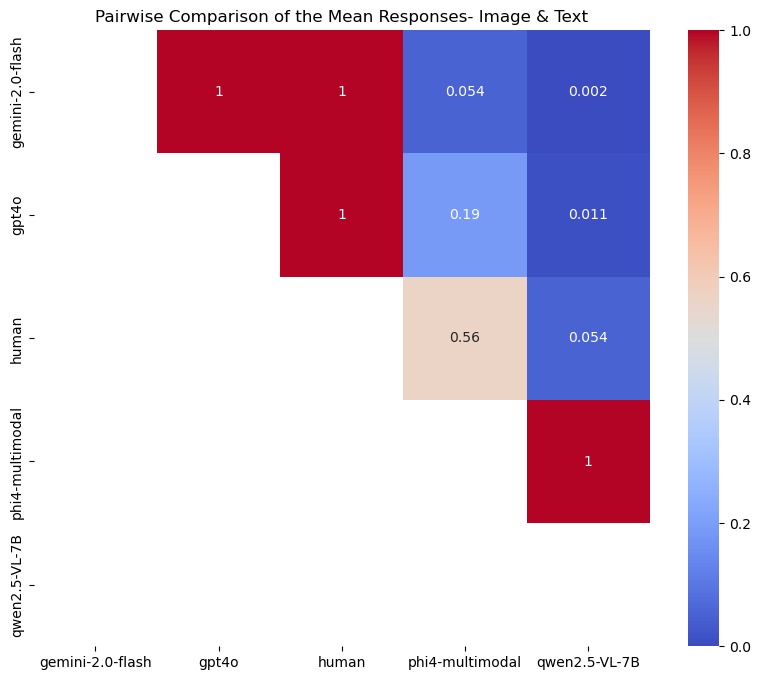

In [103]:
dfc = final_pairwise(img_text_avg_err.T[content_metrics].T).round(3)
mask = np.tril(np.ones_like(dfc, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    dfc, 
    mask=mask, 
    annot=True, 
    cmap="coolwarm", 
    vmin=0, vmax=1, 
    square=True, 
    cbar_kws={"shrink": 1.0}
)
plt.title("Pairwise Comparison of the Mean Responses- Image & Text")
plt.show()

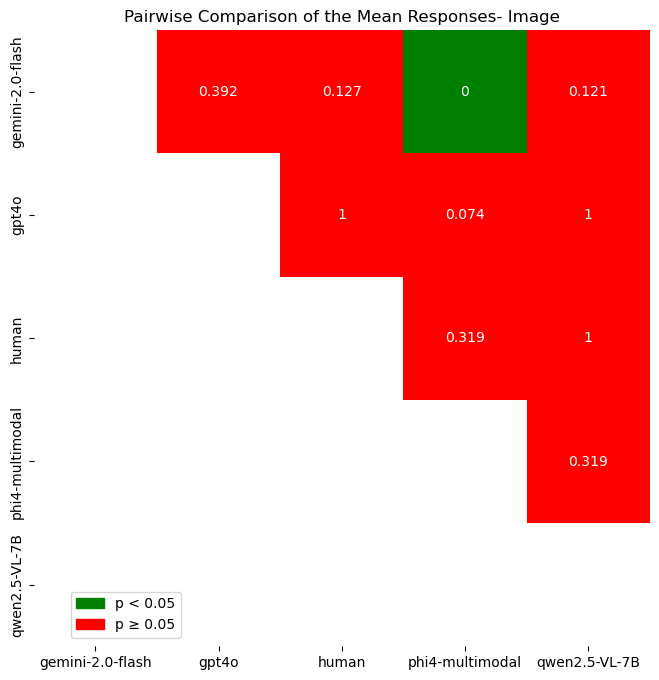

In [104]:
import matplotlib.patches as mpatches

# Load your matrix
dfc = final_pairwise(img_avg_err.T[content_metrics].T).round(3)

# Mask the lower triangle (keep upper triangle + diagonal)
mask = np.tril(np.ones_like(dfc, dtype=bool))

# Define custom color mapping (green if < 0.05, else red)
binary_colors = dfc.copy()
binary_colors[:] = np.where(dfc < 0.05, 0, 1)  # 0 = green, 1 = red

plt.figure(figsize=(10, 8))
sns.heatmap(
    binary_colors, 
    mask=mask, 
    annot=dfc.round(3),   # show original values on top
    fmt="g",             # keep numbers as-is
    cmap=sns.color_palette(["green", "red"]), 
    cbar=False,          # remove colorbar
    square=True
)

# Add custom legend
green_patch = mpatches.Patch(color="green", label="p < 0.05")
red_patch = mpatches.Patch(color="red", label="p ≥ 0.05")
plt.legend(
    handles=[green_patch, red_patch],
    loc="upper right",
    bbox_to_anchor=(0.25, 0.1)  # push legend outside heatmap
)

plt.title("Pairwise Comparison of the Mean Responses- Image")
plt.show()

In [105]:
dfc

,gemini-2.0-flash,gpt4o,human,phi4-multimodal,qwen2.5-VL-7B
gemini-2.0-flash,1.000,0.392,0.127,0.000,0.121
gpt4o,0.392,1.000,1.000,0.074,1.000
human,0.127,1.000,1.000,0.319,1.000
phi4-multimodal,0.000,0.074,0.319,1.000,0.319
qwen2.5-VL-7B,0.121,1.000,1.000,0.319,1.000


In [ ]:
eng_pair = final_pairwise(eng_txt_avg_err[content_metrics])
hausa_pair = final_pairwise(hausa_txt_avg_err)
yor_pair = final_pairwise(yor_txt_avg_err)
igbo_pair = final_pairwise(igbo_txt_avg_err)
trans_yor_pair = final_pairwise(trans_yor_txt_avg_err)
trans_hausa_pair = final_pairwise(trans_hausa_txt_avg_err)
trans_igbo_pair = final_pairwise(trans_igbo_txt_avg_err)
aud_eng_pair = final_pairwise(eng_aud_avg_err)
aud_hausa_pair = final_pairwise(hausa_aud_avg_err)
aud_yor_pair = final_pairwise(yor_aud_avg_err)
aud_pid_pair = final_pairwise(pidgin_aud_avg_err)

In [547]:
art_anova_pairwise(df_long, metric_col="score", model_col="model")

,claude-4-sonnet,deepseek-R1,gemini-2.0-flash,gemma-3-27b,gpt-4.1,gpt4o,human,llama-3.3-70b,llama-4-maverick,o4-mini,phi4-multimodal,qwen-2.5-32b
claude-4-sonnet,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
deepseek-R1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
gemini-2.0-flash,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
gemma-3-27b,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
gpt-4.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
gpt4o,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
human,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
llama-3.3-70b,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
llama-4-maverick,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
o4-mini,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [575]:
def normalize_and_rank(df: pd.DataFrame, method: str = "mean", human_last: bool = True) -> pd.DataFrame:
    """
    Normalize metrics so that higher = better, then rank models left→right.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame where rows = criteria, columns = models.
    lower_is_better : list
        List of criteria names (rows) where smaller values are better.
    method : str, optional
        "sum" or "mean" to aggregate.
    human_last : bool, optional
        Ensure 'human' column is placed last.
    
    Returns
    -------
    pd.DataFrame
        Reordered DataFrame with models ranked best→worst.
    """

    lower_is_better = ["harm", "bias", "hallucination"]
    
    # Copy to avoid mutating original
    df_adj = df.copy()

    # Align direction: for "lower is better", flip values
    for metric in lower_is_better:
        if metric in df_adj.index:
            max_val = df_adj.loc[metric].max()
            df_adj.loc[metric] = max_val - df_adj.loc[metric]

    # Aggregate per model
    if method == "sum":
        scores = df_adj.sum(axis=0)
    else:
        scores = df_adj.mean(axis=0)

    # Sort models by score
    sorted_cols = scores.sort_values(ascending=False).index.tolist()

    # Move 'human' to the end
    if human_last and "human" in sorted_cols:
        sorted_cols = [c for c in sorted_cols if c != "human"] + ["human"]

    return df[sorted_cols]


In [587]:
def split_normalize_rank(df: pd.DataFrame, method: str = "mean", human_last: bool = True) -> pd.DataFrame:
    mean_df = df.copy()
    error_df = df.copy()
    
    for col in df.columns:
        # Extract mean
        mean_df[col] = df[col].str.extract(r'([0-9]*\.?[0-9]+)').astype(float)
        
        # Extract error (inside parentheses)
        error_df[col] = df[col].str.extract(r'\((.*?)\)').astype(float)

    lower_is_better = ["harm", "bias", "hallucination"]
    
    # Copy to avoid mutating original
    df_adj = mean_df.copy()

    # Align direction: for "lower is better", flip values
    for metric in lower_is_better:
        if metric in df_adj.index:
            max_val = df_adj.loc[metric].max()
            df_adj.loc[metric] = max_val - df_adj.loc[metric]

    # Aggregate per model
    if method == "sum":
        scores = df_adj.sum(axis=0)
    else:
        scores = df_adj.mean(axis=0)

    # Sort models by score
    sorted_cols = scores.sort_values(ascending=False).index.tolist()

    # Move 'human' to the end
    if human_last and "human" in sorted_cols:
        sorted_cols = [c for c in sorted_cols if c != "human"] + ["human"]

    return df[sorted_cols]

In [588]:
split_normalize_rank(eng_txt_avg_err)

,gemini-2.0-flash,gpt-4.1,claude-4-sonnet,deepseek-R1,gpt4o,llama-4-maverick,llama-3.3-70b,gemma-3-27b,o4-mini,phi4-multimodal,qwen-2.5-32b,human
factuality,4.85 (0.04),4.85 (0.08),4.86 (0.07),4.86 (0.06),4.79 (0.06),4.82 (0.08),4.78 (0.05),4.57 (0.08),4.69 (0.10),4.46 (0.09),4.15 (0.11),4.12 (0.11)
appropriatness,4.47 (0.08),4.57 (0.12),4.39 (0.13),4.33 (0.14),4.46 (0.08),4.38 (0.13),4.41 (0.08),4.20 (0.10),4.01 (0.17),4.17 (0.10),3.79 (0.12),3.90 (0.11)
adequacy,4.86 (0.05),4.83 (0.08),4.86 (0.07),4.88 (0.07),4.78 (0.06),4.78 (0.08),4.81 (0.05),4.60 (0.09),4.70 (0.11),4.48 (0.09),4.12 (0.11),4.11 (0.11)
self_awareness,4.35 (0.10),4.13 (0.18),4.41 (0.15),4.20 (0.17),4.13 (0.12),4.30 (0.16),4.18 (0.11),3.96 (0.13),4.25 (0.17),3.87 (0.13),3.65 (0.13),3.69 (0.13)
clinical reasoning,4.84 (0.05),4.75 (0.10),4.79 (0.09),4.81 (0.08),4.72 (0.07),4.71 (0.11),4.74 (0.06),4.55 (0.09),4.59 (0.13),4.37 (0.10),4.08 (0.11),3.99 (0.11)
empathy,4.84 (0.05),4.79 (0.10),4.68 (0.11),4.58 (0.13),4.80 (0.06),4.65 (0.11),4.77 (0.06),4.59 (0.08),4.31 (0.16),4.51 (0.09),4.08 (0.12),3.75 (0.12)
fluency/clarity,4.94 (0.03),4.87 (0.07),4.86 (0.07),4.91 (0.05),4.93 (0.03),4.88 (0.07),4.90 (0.04),4.77 (0.06),4.71 (0.10),4.87 (0.05),4.75 (0.06),4.77 (0.06)
hallucination,1.05 (0.03),1.02 (0.03),1.04 (0.04),1.05 (0.03),1.12 (0.05),1.59 (0.14),2.03 (0.12),1.22 (0.06),1.05 (0.04),1.20 (0.06),2.93 (0.14),1.31 (0.07)
bias,1.28 (0.05),1.17 (0.07),1.23 (0.07),1.27 (0.08),1.27 (0.06),1.24 (0.07),1.32 (0.06),1.31 (0.06),1.52 (0.13),1.46 (0.08),1.59 (0.09),1.52 (0.08)
harm,1.06 (0.03),1.04 (0.04),1.02 (0.03),1.01 (0.01),1.09 (0.04),1.02 (0.03),1.04 (0.03),1.05 (0.03),1.15 (0.08),1.16 (0.05),1.30 (0.07),1.25 (0.06)


In [589]:
eng_txt_avg_err_sorted = split_normalize_rank(eng_txt_avg_err)
eng_aud_avg_err_sorted = split_normalize_rank(eng_aud_avg_err)
yor_txt_avg_err_sorted = split_normalize_rank(yor_txt_avg_err)
yor_aud_avg_err_sorted = split_normalize_rank(yor_aud_avg_err)
hausa_txt_avg_err_sorted = split_normalize_rank(hausa_txt_avg_err)
hausa_aud_avg_err_sorted = split_normalize_rank(hausa_aud_avg_err)
igbo_txt_avg_err_sorted = split_normalize_rank(igbo_txt_avg_err)
igbo_aud_avg_err_sorted = split_normalize_rank(igbo_aud_avg_err)
pidgin_txt_avg_err_sorted = split_normalize_rank(pidgin_txt_avg_err)
pidgin_aud_avg_err_sorted = split_normalize_rank(pidgin_aud_avg_err)
img_text_avg_err_sorted = split_normalize_rank(img_text_avg_err)
img_avg_err_sorted = split_normalize_rank(img_avg_err)
sft_eng_txt_cat_sorted = normalize_and_rank(sft_eng_txt_cat)
com_eng_txt_cat_sorted = normalize_and_rank(com_eng_txt_cat)
con_eng_txt_cat_sorted = normalize_and_rank(con_eng_txt_cat)
sft_eng_aud_cat_sorted = normalize_and_rank(sft_eng_aud_cat)
com_eng_aud_cat_sorted = normalize_and_rank(com_eng_aud_cat)
con_eng_aud_cat_sorted = normalize_and_rank(con_eng_aud_cat)
sft_non_eng_txt_cat_sorted = normalize_and_rank(sft_non_eng_txt_cat)
com_non_eng_txt_cat_sorted = normalize_and_rank(com_non_eng_txt_cat)
con_non_eng_txt_cat_sorted = normalize_and_rank(con_non_eng_txt_cat)
sft_non_eng_aud_cat_sorted = normalize_and_rank(sft_non_eng_aud_cat)
com_non_eng_aud_cat_sorted = normalize_and_rank(com_non_eng_aud_cat)
con_non_eng_aud_cat_sorted = normalize_and_rank(con_non_eng_aud_cat)
trans_hausa_txt_avg_err_sorted = split_normalize_rank(trans_hausa_txt_avg_err)
trans_igbo_txt_avg_err_sorted = split_normalize_rank(trans_igbo_txt_avg_err)
trans_pidgin_txt_avg_err_sorted = split_normalize_rank(trans_pidgin_txt_avg_err)
trans_yor_txt_avg_err_sorted = split_normalize_rank(trans_yor_txt_avg_err)
yor_diff_sorted = normalize_and_rank(yor_diff)
hausa_diff_sorted = normalize_and_rank(hausa_diff)
igbo_diff_sorted = normalize_and_rank(igbo_diff)
pidgin_diff_sorted = normalize_and_rank(pidgin_diff)
diff_eng_txt_vs_aud_sorted = normalize_and_rank(diff_eng_txt_vs_aud)
 



In [583]:
sft_eng_txt_cat

model,claude-4-sonnet,deepseek-R1,gemini-2.0-flash,gemma-3-27b,gpt-4.1,gpt4o,human,llama-3.3-70b,llama-4-maverick,o4-mini,phi4-multimodal,qwen-2.5-32b
category group,,,,,,,,,,,,
Body Systems,1.136265,1.149103,1.168085,1.175977,1.102857,1.132169,1.449583,1.497330,1.280843,1.209070,1.316020,2.000927
Common disease symptoms,1.121837,1.177333,1.183303,1.155048,1.146977,1.145455,1.391591,1.572035,1.421429,1.452800,1.389208,1.953636
Emergencies,1.110833,1.068205,1.097467,1.320250,1.122333,1.130986,1.275217,1.455526,1.386216,1.385789,1.328875,1.863797
Infectious Diseasee,1.066000,1.200000,1.000000,1.082500,1.000000,1.428571,1.237143,1.721667,1.534000,1.000000,1.030000,1.963333
Mental Health,1.127692,1.088667,1.190000,1.285714,1.066667,1.262424,1.694583,1.596552,1.067000,1.102308,1.171613,1.747241
Nutrition,1.042113,1.085455,1.068771,1.162670,1.018864,1.141782,1.281714,1.406842,1.232540,1.079206,1.235789,1.930621
Reproductive Health,1.079630,1.059032,1.138480,1.207754,1.058889,1.205469,1.249099,1.363714,1.194462,1.240370,1.190000,1.906356


In [ ]:
# with pd.ExcelWriter("combined_tabs.xlsx") as writer:
#     eng_txt_avg_err_sorted.to_excel(writer, sheet_name='eng_txt_avg_err')
#     eng_aud_avg_err_sorted.to_excel(writer, sheet_name='eng_aud_avg_err')
#     yor_txt_avg_err_sorted.to_excel(writer, sheet_name='yor_txt_avg_err')
#     yor_aud_avg_err_sorted.to_excel(writer, sheet_name='yor_aud_avg_err')
#     hausa_txt_avg_err_sorted.to_excel(writer, sheet_name='hausa_txt_avg_err')
#     hausa_aud_avg_err_sorted.to_excel(writer, sheet_name='hausa_aud_avg_err')
#     igbo_txt_avg_err_sorted.to_excel(writer, sheet_name='igbo_txt_avg_err')
#     igbo_aud_avg_err_sorted.to_excel(writer, sheet_name='igbo_aud_avg_err')
#     pidgin_txt_avg_err_sorted.to_excel(writer, sheet_name='pidgin_txt_avg_err')
#     pidgin_aud_avg_err_sorted.to_excel(writer, sheet_name='pidgin_aud_avg_err')
#     img_text_avg_err_sorted.to_excel(writer, sheet_name='img_text_avg_err')
#     img_avg_err_sorted.to_excel(writer, sheet_name='img_avg_err')
#     sft_eng_txt_cat_sorted.to_excel(writer, sheet_name='sft_eng_txt_cat')
#     com_eng_txt_cat_sorted.to_excel(writer, sheet_name='com_eng_txt_cat')
#     con_eng_txt_cat_sorted.to_excel(writer, sheet_name='con_eng_txt_cat')
#     sft_eng_aud_cat_sorted.to_excel(writer, sheet_name='sft_eng_aud_cat')
#     com_eng_aud_cat_sorted.to_excel(writer, sheet_name='com_eng_aud_cat')
#     con_eng_aud_cat_sorted.to_excel(writer, sheet_name='con_eng_aud_cat')
#     sft_non_eng_txt_cat_sorted.to_excel(writer, sheet_name='sft_non_eng_txt_cat')
#     com_non_eng_txt_cat_sorted.to_excel(writer, sheet_name='com_non_eng_txt_cat')
#     con_non_eng_txt_cat_sorted.to_excel(writer, sheet_name='con_non_eng_txt_cat')
#     sft_non_eng_aud_cat_sorted.to_excel(writer, sheet_name='sft_non_eng_aud_cat')
#     com_non_eng_aud_cat.to_excel(writer, sheet_name='com_non_eng_aud_cat')
#     con_non_eng_aud_cat_sorted.to_excel(writer, sheet_name='con_non_eng_aud_cat')
#     trans_hausa_txt_avg_err_sorted.to_excel(writer, sheet_name='trans_hausa_txt_avg_err')
#     trans_igbo_txt_avg_err_sorted.to_excel(writer, sheet_name='trans_igbo_txt_avg_err')
#     trans_pidgin_txt_avg_err_sorted.to_excel(writer, sheet_name='trans_pidgin_txt_avg_err')
#     trans_yor_txt_avg_err_sorted.to_excel(writer, sheet_name='trans_yor_txt_avg_err')
#     yor_diff_sorted.to_excel(writer, sheet_name='yor_diff')
#     hausa_diff_sorted.to_excel(writer, sheet_name='hausa_diff')
#     igbo_diff_sorted.to_excel(writer, sheet_name='igbo_diff')
#     pidgin_diff_sorted.to_excel(writer, sheet_name='pidgin_diff')
#     diff_eng_txt_vs_aud_sorted.to_excel(writer, sheet_name='diff_eng_txt_vs_aud')
    




In [ ]:
eng_txt_avg_err_sorted.columns

In [108]:
names_r = {'gemini-2.0-flash':'gemini-2.0','llama-4-maverick':'llama-4',
       'phi4-multimodal':'phi4', 'index':''}

In [594]:
import pandas as pd

# Collect all your DataFrames in a dict instead of writing them one by one
sheets = {
    'eng_txt_avg_err': eng_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'eng_aud_avg_err': eng_aud_avg_err_sorted.reset_index().rename(columns=names_r),
    'yor_txt_avg_err': yor_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'yor_aud_avg_err': yor_aud_avg_err_sorted.reset_index().rename(columns=names_r),
    'hausa_txt_avg_err': hausa_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'hausa_aud_avg_err': hausa_aud_avg_err_sorted.reset_index().rename(columns=names_r),
    'igbo_txt_avg_err': igbo_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'igbo_aud_avg_err': igbo_aud_avg_err_sorted.reset_index().rename(columns=names_r),
    'pidgin_txt_avg_err': pidgin_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'pidgin_aud_avg_err': pidgin_aud_avg_err_sorted.reset_index().rename(columns=names_r),
    'img_text_avg_err': img_text_avg_err_sorted.reset_index().rename(columns=names_r),
    'img_avg_err': img_avg_err_sorted.reset_index().rename(columns=names_r),
    'sft_eng_txt_cat': sft_eng_txt_cat_sorted.reset_index().rename(columns=names_r),
    'com_eng_txt_cat': com_eng_txt_cat_sorted.reset_index().rename(columns=names_r),
    'con_eng_txt_cat': con_eng_txt_cat_sorted.reset_index().rename(columns=names_r),
    'sft_eng_aud_cat': sft_eng_aud_cat_sorted.reset_index().rename(columns=names_r),
    'com_eng_aud_cat': com_eng_aud_cat_sorted.reset_index().rename(columns=names_r),
    'con_eng_aud_cat': con_eng_aud_cat_sorted.reset_index().rename(columns=names_r),
    'sft_non_eng_txt_cat': sft_non_eng_txt_cat_sorted.reset_index().rename(columns=names_r),
    'com_non_eng_txt_cat': com_non_eng_txt_cat_sorted.reset_index().rename(columns=names_r),
    'con_non_eng_txt_cat': con_non_eng_txt_cat_sorted.reset_index().rename(columns=names_r),
    'sft_non_eng_aud_cat': sft_non_eng_aud_cat_sorted.reset_index().rename(columns=names_r),
    'com_non_eng_aud_cat': com_non_eng_aud_cat_sorted.reset_index().rename(columns=names_r),
    'con_non_eng_aud_cat': con_non_eng_aud_cat_sorted.reset_index().rename(columns=names_r),
    'trans_hausa_txt_avg_err': trans_hausa_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'trans_igbo_txt_avg_err': trans_igbo_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'trans_pidgin_txt_avg_err': trans_pidgin_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'trans_yor_txt_avg_err': trans_yor_txt_avg_err_sorted.reset_index().rename(columns=names_r),
    'yor_diff': yor_diff_sorted.reset_index().rename(columns=names_r),
    'hausa_diff': hausa_diff_sorted.reset_index().rename(columns=names_r),
    'igbo_diff': igbo_diff_sorted.reset_index().rename(columns=names_r),
    'pidgin_diff': pidgin_diff_sorted.reset_index().rename(columns=names_r),
    'diff_eng_txt_vs_aud': diff_eng_txt_vs_aud_sorted.reset_index().rename(columns=names_r),
}

with pd.ExcelWriter("combined_tabs2.xlsx", engine="xlsxwriter") as writer:
    for sheet_name, df in sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

        # Autofit columns
        worksheet = writer.sheets[sheet_name]
        for i, col in enumerate(df.columns):
            # max length between header and column contents
            max_len = max(
                df[col].astype(str).map(len).max(),
                len(str(col))
            ) + 2
            worksheet.set_column(i, i, max_len)


In [332]:
ch_final['user_id'][0]

'2f21f9e29e7e0baea6edf614440462e71488ba56'

Total number of ratings

Ratings per model

Ratings per language

Ratings per modality

Ratings by difficulty

Ratings per model per modality

Ratings per model per language

Ratings by category group

In [344]:
import pandas as pd
from docx import Document

def save_doc(df,title,save_name):

    # Create a Word document
    doc = Document()
    doc.add_heading(title, level=1)

    # Add table
    table = doc.add_table(rows=1, cols=len(df.columns))
    table.style = 'Table Grid'

    # Add header row
    hdr_cells = table.rows[0].cells
    for i, col_name in enumerate(df.columns):
        hdr_cells[i].text = str(col_name)

    # Add data rows
    for index, row in df.iterrows():
        row_cells = table.add_row().cells
        for i, val in enumerate(row):
            row_cells[i].text = str(val)

    # Save document
    doc.save(f"{save_name}.docx")


In [109]:
ch_final = chws_data[chws_data['model']!='distractor'].reset_index(drop=True).copy()

In [110]:
# Ratings per model
ch_final['model'].value_counts().to_frame().reset_index()

,model,count
0,gemini-2.0-flash,2166
1,phi4-multimodal,2166
2,gpt4o,2166
3,human,1537
4,gemma-3-27b,1186
5,qwen-2.5-32b,1186
6,llama-3.3-70b,1186
7,qwen2-Audio-7B,629
8,qwen2.5-VL-7B,351
9,llama-4-maverick,312


In [111]:
ch_final['language'].value_counts().to_frame().reset_index()

,language,count
0,English,9317
1,Yoruba,2216
2,Hausa,1206
3,Pidgin,1131
4,Igbo,263


In [112]:
ch_final['modality'].value_counts().to_frame().reset_index()

,modality,count
0,text,9862
1,audio,2516
2,image,1755


In [113]:
ch_final['difficulty'].value_counts().to_frame().reset_index()

,difficulty,count
0,Medium,7908
1,Hard,4330
2,Easy,1895


In [114]:
# Ratings per model per modality
ch_final.groupby(['model', 'modality']).size().reset_index(name='count')

,model,modality,count
0,claude-4-sonnet,text,312
1,deepseek-R1,text,312
2,gemini-2.0-flash,audio,629
3,gemini-2.0-flash,image,351
4,gemini-2.0-flash,text,1186
5,gemma-3-27b,text,1186
6,gpt-4.1,text,312
7,gpt4o,audio,629
8,gpt4o,image,351
9,gpt4o,text,1186


In [115]:
ch_final.groupby(['model', 'modality']).size().reset_index(name='count')

,model,modality,count
0,claude-4-sonnet,text,312
1,deepseek-R1,text,312
2,gemini-2.0-flash,audio,629
3,gemini-2.0-flash,image,351
4,gemini-2.0-flash,text,1186
5,gemma-3-27b,text,1186
6,gpt-4.1,text,312
7,gpt4o,audio,629
8,gpt4o,image,351
9,gpt4o,text,1186


In [116]:
ch_final.shape

(14133, 68)

In [117]:
# Ratings per model per language
ch_final.groupby(['model', 'language']).size().reset_index(name='count')

,model,language,count
0,claude-4-sonnet,English,312
1,deepseek-R1,English,312
2,gemini-2.0-flash,English,1316
3,gemini-2.0-flash,Hausa,213
4,gemini-2.0-flash,Igbo,41
5,gemini-2.0-flash,Pidgin,210
6,gemini-2.0-flash,Yoruba,386
7,gemma-3-27b,English,714
8,gemma-3-27b,Hausa,118
9,gemma-3-27b,Igbo,33


In [118]:
mod_cat = ch_final['category group'].value_counts().to_frame().reset_index()
mod_cat

,category group,count
0,Body Systems,3922
1,Nutrition,3303
2,Reproductive Health,2489
3,Common disease symptoms,2129
4,Emergencies,1549
5,Mental Health,527
6,Infectious Diseasee,144


In [120]:
ch_no_img = ch_final[~ch_final['modality'].str.contains('image')]

In [121]:

ch_no_img.groupby(['model','difficulty'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)

factuality  appropriatness  adequacy  \
model            difficulty                                         
claude-4-sonnet  Easy              4.96            4.60      5.00   
                 Hard              4.90            4.37      4.90   
                 Medium            4.81            4.38      4.81   
deepseek-R1      Easy              4.81            4.19      4.81   
                 Hard              4.93            4.34      4.93   
                 Medium            4.83            4.34      4.86   
gemini-2.0-flash Easy              4.59            4.31      4.67   
                 Hard              4.61            4.22      4.65   
                 Medium            4.63            4.32      4.61   
gemma-3-27b      Easy              4.09            3.93      4.17   
                 Hard              4.32            3.98      4.31   
                 Medium            4.15            3.85      4.16   
gpt-4.1          Easy              4.88            4.35      4.85   
                 Hard              4.88            4.69      4.87   
                 Medium            4.82            4.51      4.79   
gpt4o            Easy              4.53            4.19      4.40   
                 Hard              4.52            4.19      4.50   
                 Medium            4.50            4.26      4.49   
human            Easy              4.17            4.11      4.13   
                 Hard              4.25            3.86      4.22   
                 Medium            4.10            3.94      4.07   
llama-3.3-70b    Easy              3.89            3.73      3.93   
                 Hard              4.22            3.83      4.27   
                 Medium            4.07            3.80      4.08   
llama-4-maverick Easy              5.00            4.70      4.93   
                 Hard              4.87            4.43      4.80   
                 Medium            4.76            4.29      4.74   
o4-mini          Easy              4.33            3.85      4.37   
                 Hard              4.77            3.90      4.78   
                 Medium            4.68            4.12      4.69   
phi4-multimodal  Easy              3.23            3.09      3.21   
                 Hard              3.59            3.31      3.58   
                 Medium            3.30            3.19      3.30   
qwen-2.5-32b     Easy              3.20            2.93      3.19   
                 Hard              3.47            3.13      3.45   
                 Medium            3.40            3.24      3.37   
qwen2-Audio-7B   Easy              1.67            1.67      1.65   
                 Hard              2.39            2.36      2.23   
                 Medium            2.06            1.99      1.94   

                             expert recall  self_awareness  
model            difficulty                                 
claude-4-sonnet  Easy                 1.32            4.68  
                 Hard                 1.13            4.61  
                 Medium               1.16            4.21  
deepseek-R1      Easy                 1.04            4.35  
                 Hard                 1.17            4.45  
                 Medium               1.02            4.02  
gemini-2.0-flash Easy                 1.14            4.12  
                 Hard                 1.08            4.23  
                 Medium               1.10            4.19  
gemma-3-27b      Easy                 1.10            3.62  
                 Hard                 1.07            3.72  
                 Medium               1.08            3.58  
gpt-4.1          Easy                 1.15            4.04  
                 Hard                 1.09            3.89  
                 Medium               1.07            4.36  
gpt4o            Easy                 1.15            3.95  
                 Hard                 1.09            4.03  
                 Medium               1.

In [125]:
model_ct = ch_no_img[ch_no_img['model'] != 'distractor']['model'].value_counts().to_frame().reset_index()

In [126]:
model_ct

,model,count
0,gemini-2.0-flash,1815
1,phi4-multimodal,1815
2,gpt4o,1815
3,human,1186
4,gemma-3-27b,1186
5,qwen-2.5-32b,1186
6,llama-3.3-70b,1186
7,qwen2-Audio-7B,629
8,llama-4-maverick,312
9,o4-mini,312


C:\Users\Ezinwanne\AppData\Local\Temp\ipykernel_34360\3731415970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_ct, x='model', y='count', palette='viridis')


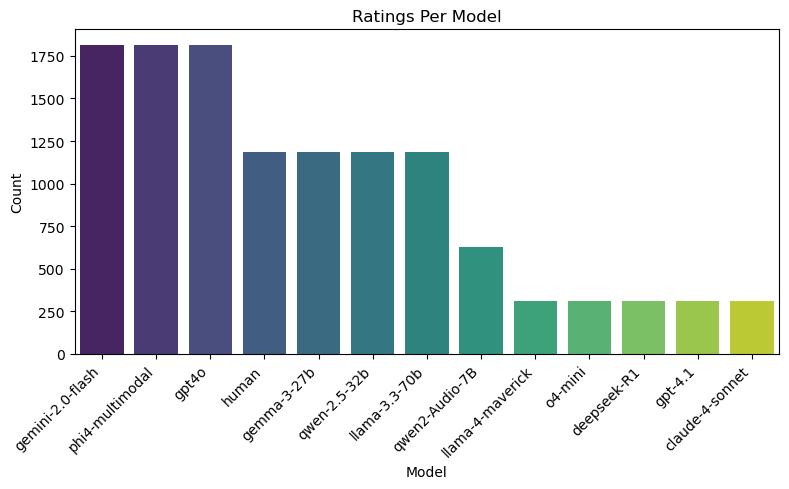

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(data=model_ct, x='model', y='count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Ratings Per Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [129]:
lang_ct = ch_final['language'].value_counts().to_frame().reset_index()
lang_ct

,language,count
0,English,9317
1,Yoruba,2216
2,Hausa,1206
3,Pidgin,1131
4,Igbo,263


In [130]:
ch_no_img['language'].value_counts()

language
English    7562
Yoruba     2216
Hausa      1206
Pidgin     1131
Igbo        263
Name: count, dtype: int64

In [131]:
df.columns

Index(['answer_id', 'question_id', 'prompt', 'category', 'SNOMED_codes',
       'project_name', 'scenario', 'scenario_len',
       'prompt_scenario_similarity', 'question', 'question_len', 'answer',
       'answer_len', 'difficulty', 'language', 'audio_duration', 'src_lang',
       'src_text', 'target_lang', 'target_text', 'transcribed_audio_language',
       'audio_transcribed_duration', 'data_audio_recording_path',
       'data_audio_path', 'data_image_path', 'data_video_path',
       'data_audio_path_transcribed'],
      dtype='object')

In [ ]:
ch_no_img.groupby(['language','modality'])['answer_id'].count().to_frame()

answer_id
language modality           
English  audio          1031
         text           6845
Hausa    audio           385
         text            839
Igbo     audio            33
         text            234
Pidgin   audio           458
         text            687
Yoruba   audio           652
         text           1589

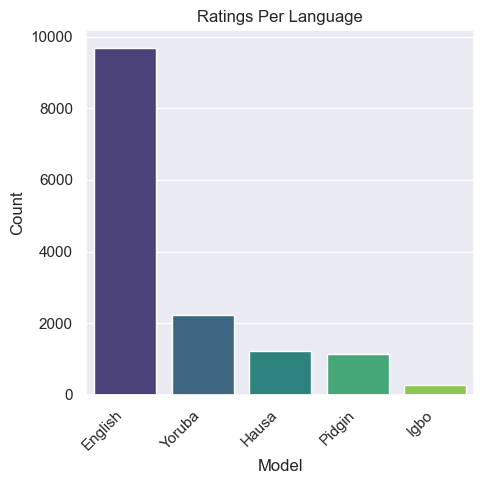

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=lang_ct, x='language', y='count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Ratings Per Language')
plt.xlabel('Model')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(ch_no_img[ch_no_img['model'] != 'distractor']['modality'],ch_no_img[ch_no_img['model'] != 'distractor']['model'],).T

modality,audio,text
model,,
claude-4-sonnet,0,312
deepseek-R1,0,312
gemini-2.0-flash,629,1186
gemma-3-27b,0,1186
gpt-4.1,0,312
gpt4o,629,1186
human,0,1186
llama-3.3-70b,0,1186
llama-4-maverick,0,312


In [ ]:
mod_model = pd.crosstab(ch_final2[ch_final2['model'] != 'distractor']['modality'],ch_final2[ch_final2['model'] != 'distractor']['model'],)
mod_model

model,claude-4-sonnet,deepseek-R1,gemini-2.0-flash,gemma-3-27b,gpt-4.1,gpt4o,human,llama-3.3-70b,llama-4-maverick,o4-mini,phi4-multimodal,qwen-2.5-32b,qwen2-Audio-7B,qwen2.5-VL-7B
modality,,,,,,,,,,,,,,
audio,0,0,629,0,0,629,0,0,0,0,629,0,629,0
image,0,0,351,0,0,351,351,0,0,0,351,0,0,351
text,312,312,1186,1186,312,1186,1186,1186,312,312,1186,1186,0,0


In [ ]:
pd.crosstab(ch_no_img[ch_no_img['model'] != 'distractor']['modality'],ch_no_img[ch_no_img['model'] != 'distractor']['model'],).T

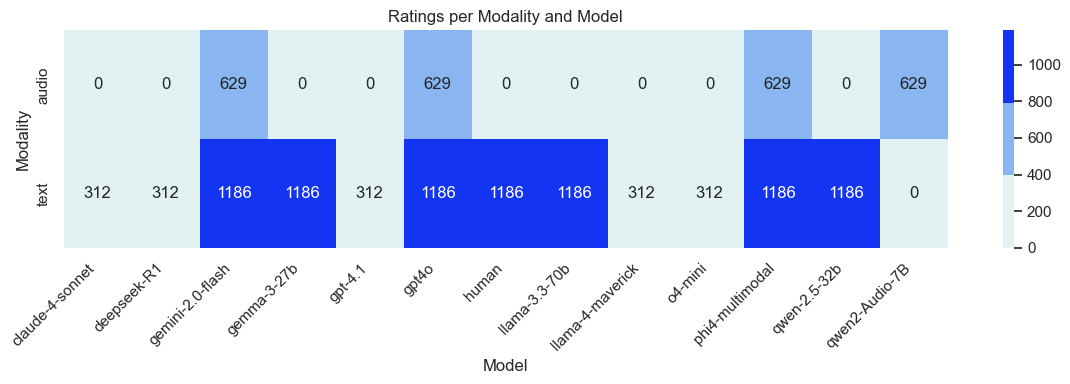

In [ ]:
plt.figure(figsize=(12, 4))
custom_palette = ["#e2f2f3", "#89b6f1", "#1334f0"]
sns.heatmap(pd.crosstab(ch_no_img[ch_no_img['model'] != 'distractor']['modality'],ch_no_img[ch_no_img['model'] != 'distractor']['model'],), annot=True, fmt="d", cmap=custom_palette, cbar=True)
plt.title("Ratings per Modality and Model")
plt.xlabel("Model")
plt.ylabel("Modality")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('/home/chinemelu/asr_benchmarking/chews/hf/final/charts/ratings_per_model_modality.png', dpi=300)
plt.show()

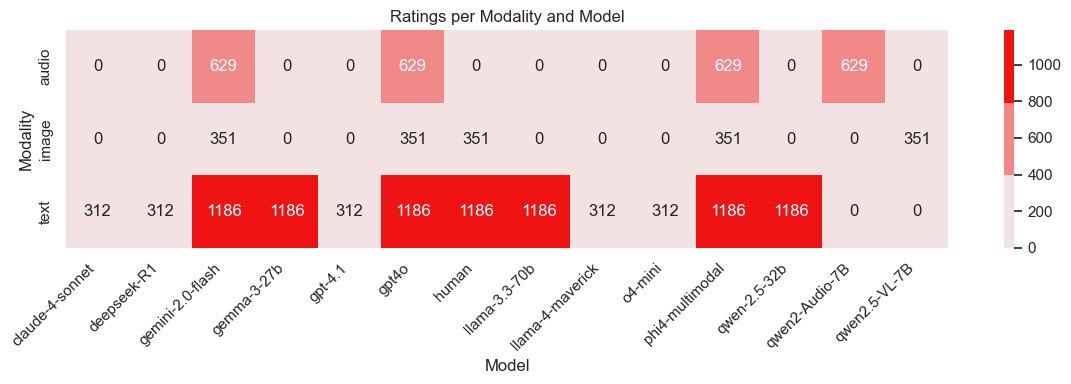

In [ ]:
plt.figure(figsize=(12, 4))
custom_palette = ["#f3e2e2", "#f18989", "#f01313"]
sns.heatmap(mod_model, annot=True, fmt="d", cmap=custom_palette, cbar=True)
plt.title("Ratings per Modality and Model")
plt.xlabel("Model")
plt.ylabel("Modality")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('/home/chinemelu/asr_benchmarking/chews/hf/final/charts/ratings_per_model_modality.png', dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create the overall figure and custom gridspec
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])  # 2 rows, 2 columns

# --- Plot 1: Ratings Per Model ---
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=model_ct, x='model', y='count', palette='viridis', ax=ax1)
ax1.set_title('Ratings Per Model')
ax1.set_xlabel('Model')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
for tick in ax1.get_xticklabels():
    tick.set_horizontalalignment('right')

# --- Plot 2: Ratings Per Language ---
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=lang_ct, x='language', y='count', palette='viridis', ax=ax2)
ax2.set_title('Ratings Per Language')
ax2.set_xlabel('Language')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# --- Plot 3: Heatmap spanning both columns (bottom full width) ---
ax3 = fig.add_subplot(gs[1, :])  # span both columns
custom_palette = ["#31688E", "#26828E","#1F9E89", "#35B779", "#6DCD59"]
sns.heatmap(mod_model, annot=True, fmt="d", cmap=custom_palette, cbar=True, ax=ax3)
#sns.heatmap(mod_model, annot=True, fmt="d", cmap='viridis', cbar=True, ax=ax3)
ax3.set_title("Ratings per Modality and Model")
ax3.set_xlabel("Model")
ax3.set_ylabel("Modality")
ax3.tick_params(axis='x', rotation=30)

# Final layout
plt.tight_layout()
plt.savefig('charts/initial_plots.png', dpi=300)

plt.show()


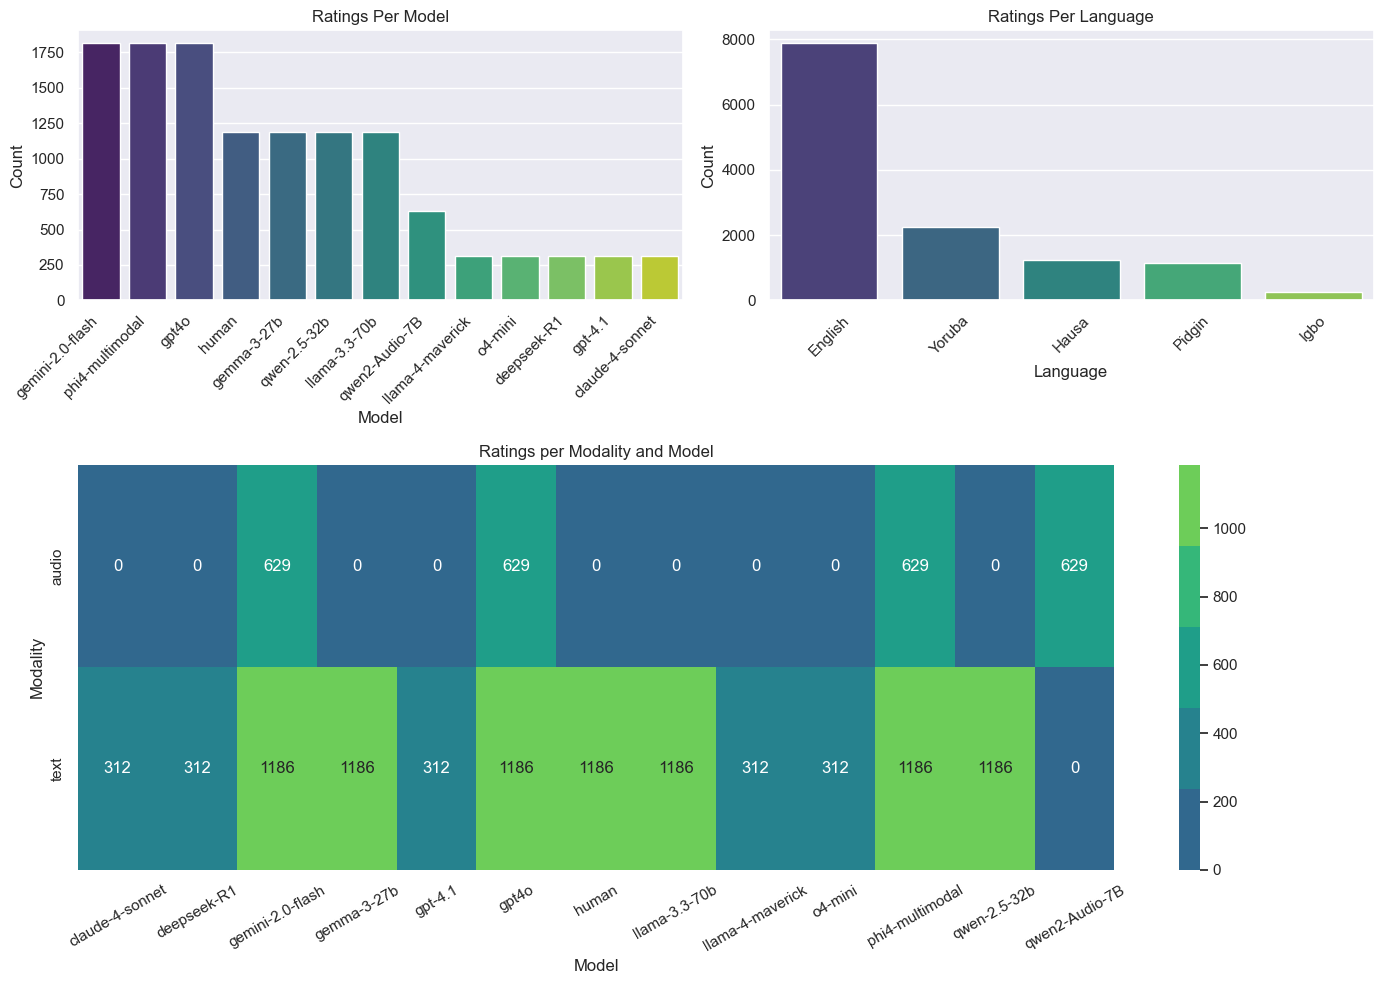

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create the overall figure and custom gridspec
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])  # 2 rows, 2 columns

# --- Plot 1: Ratings Per Model ---
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=model_ct, x='model', y='count', palette='viridis', ax=ax1)
ax1.set_title('Ratings Per Model')
ax1.set_xlabel('Model')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
for tick in ax1.get_xticklabels():
    tick.set_horizontalalignment('right')

# --- Plot 2: Ratings Per Language ---
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=ch_no_img['language'].value_counts().to_frame().reset_index(), x='language', y='count', palette='viridis', ax=ax2)
ax2.set_title('Ratings Per Language')
ax2.set_xlabel('Language')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# --- Plot 3: Heatmap spanning both columns (bottom full width) ---
ax3 = fig.add_subplot(gs[1, :])  # span both columns
custom_palette = ["#31688E", "#26828E","#1F9E89", "#35B779", "#6DCD59"]
sns.heatmap(pd.crosstab(ch_no_img[ch_no_img['model'] != 'distractor']['modality'],ch_no_img[ch_no_img['model'] != 'distractor']['model'],), annot=True, fmt="d", cmap=custom_palette, cbar=True, ax=ax3)
#sns.heatmap(mod_model, annot=True, fmt="d", cmap='viridis', cbar=True, ax=ax3)
ax3.set_title("Ratings per Modality and Model")
ax3.set_xlabel("Model")
ax3.set_ylabel("Modality")
ax3.tick_params(axis='x', rotation=30)

# Final layout
plt.tight_layout()
plt.savefig('charts/initial_plots.png', dpi=300)

plt.show()


In [ ]:
652+385+458+33

1528

In [ ]:
ch_no_img.shape

(12753, 76)

In [ ]:
lang_count = pd.DataFrame({"Language": ['English','Yoruba','Hausa','Pidgin','Igbo'],
            "Total Count": [7234,963,653,410,28],
            "Text Count": [6500,462,154,129,21],
            "Audio Count": [815,266,213,185,7] })
lang_count2 = pd.DataFrame({"Language": ['English','Non-English'],
            "Total Count": [7234,(963+653+410+28)],
            "Text Count": [6500,(462+154+129+21)],
            "Audio Count": [815,(266+213+185+7)] })
lang_count3 = pd.DataFrame({"Language": ['Yoruba','Hausa','Pidgin','Igbo'],
            "Total Count": [963,653,410,28],
            "Text Count": [462,154,129,21],
            "Audio Count": [266,213,185,7] })

In [ ]:
# lang_count = pd.DataFrame({"Language": ['English','Yoruba','Hausa','Pidgin','Igbo'],
#             "Total Count": [7876,2241,1224,1145,267],
#             "Text Count": [6845,1589,839,687,234],
#             "Audio Count": [1031,652,385,458,33] })
# lang_count2 = pd.DataFrame({"Language": ['English','Non-English'],
#             "Total Count": [7876,4877],
#             "Text Count": [6845,3349],
#             "Audio Count": [1031,1528] })
# lang_count3 = pd.DataFrame({"Language": ['Yoruba','Hausa','Pidgin','Igbo'],
#             "Total Count": [2241,1224,1145,267],
#             "Text Count": [1589,839,687,234],})

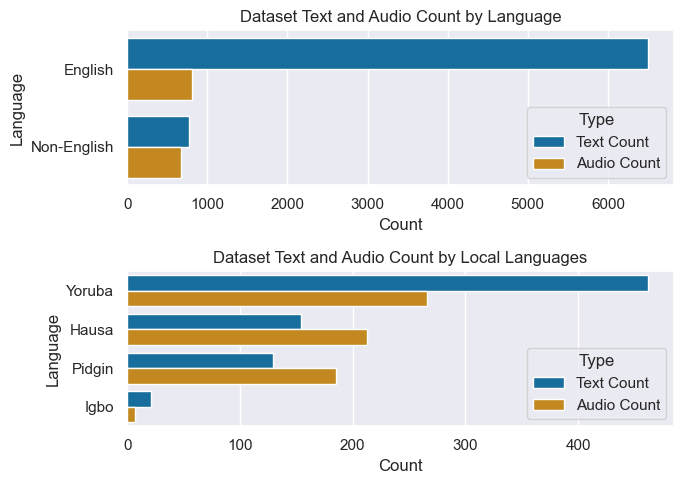

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for seaborn: melt to long format
df1 = lang_count2.melt(id_vars='Language', value_vars=['Text Count', 'Audio Count'], 
                       var_name='Type', value_name='Count')
df2 = lang_count3.melt(id_vars='Language', value_vars=['Text Count', 'Audio Count'], 
                       var_name='Type', value_name='Count')

fig, axs = plt.subplots(2, 1, figsize=(7, 5))
plt.subplots_adjust(hspace=0.5)

# --- Plot 1: Major Languages ---
sns.barplot(data=df1, y='Language', x='Count', hue='Type', ax=axs[0], palette='colorblind')
axs[0].set_title('Dataset Text and Audio Count by Language')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Language')
#axs[0].legend(title='Data Type', loc='upper right')

# --- Plot 2: Local Languages ---
sns.barplot(data=df2, y='Language', x='Count', hue='Type', ax=axs[1], palette='colorblind')
axs[1].set_title('Dataset Text and Audio Count by Local Languages')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Language')
#axs[1].legend(title='Data Type', loc='upper right')

plt.tight_layout()
plt.savefig('charts/text_audio_ct_lang.png', dpi=300)
plt.show()


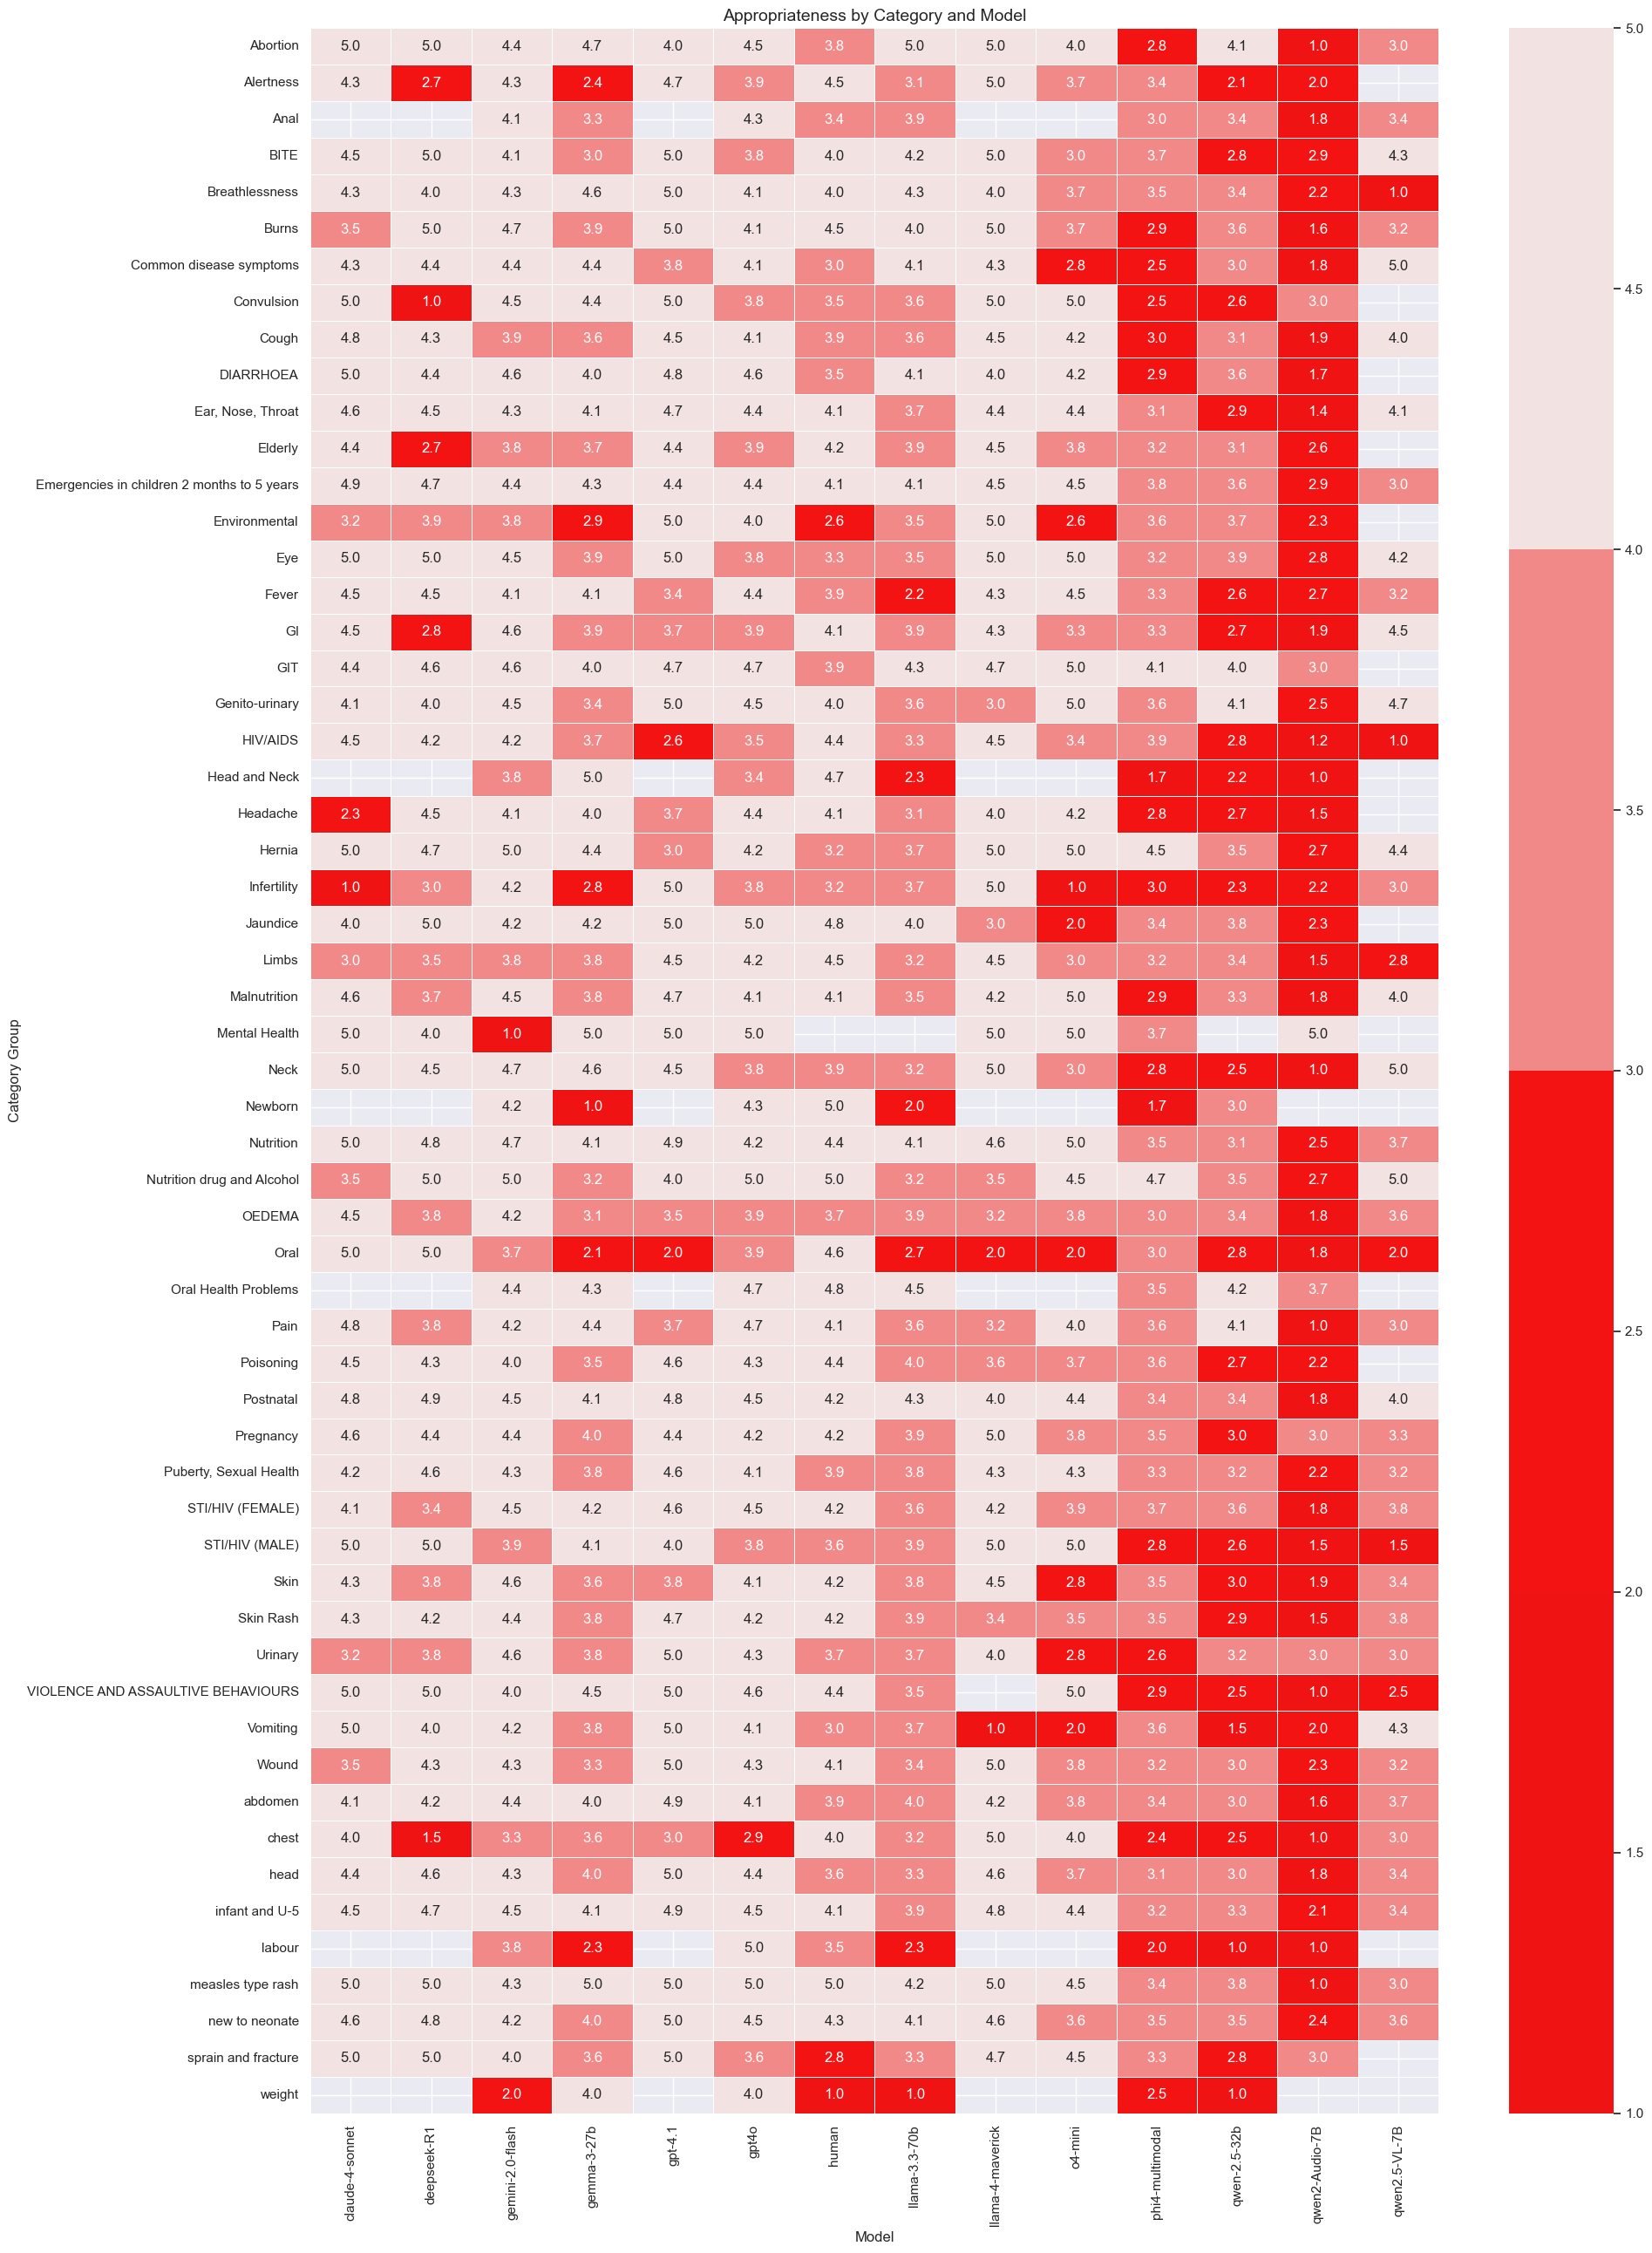

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pivot table: average appropriateness by category group and model
custom_palette = [ "#f01313", "#f41313", "#f18989","#f3e2e2",]
heatmap_data = ch_final2[ch_final2['model'] != 'distractor'].pivot_table(
    index='category',
    columns='model',
    values='appropriatness',
    aggfunc='mean'
)

plt.figure(figsize=(20, 26))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=custom_palette, linewidths=0.5)
plt.title('Appropriateness by Category and Model',fontsize=14)
plt.ylabel('Category Group')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig('charts/appr_cat_model.png', dpi=300)
plt.show()

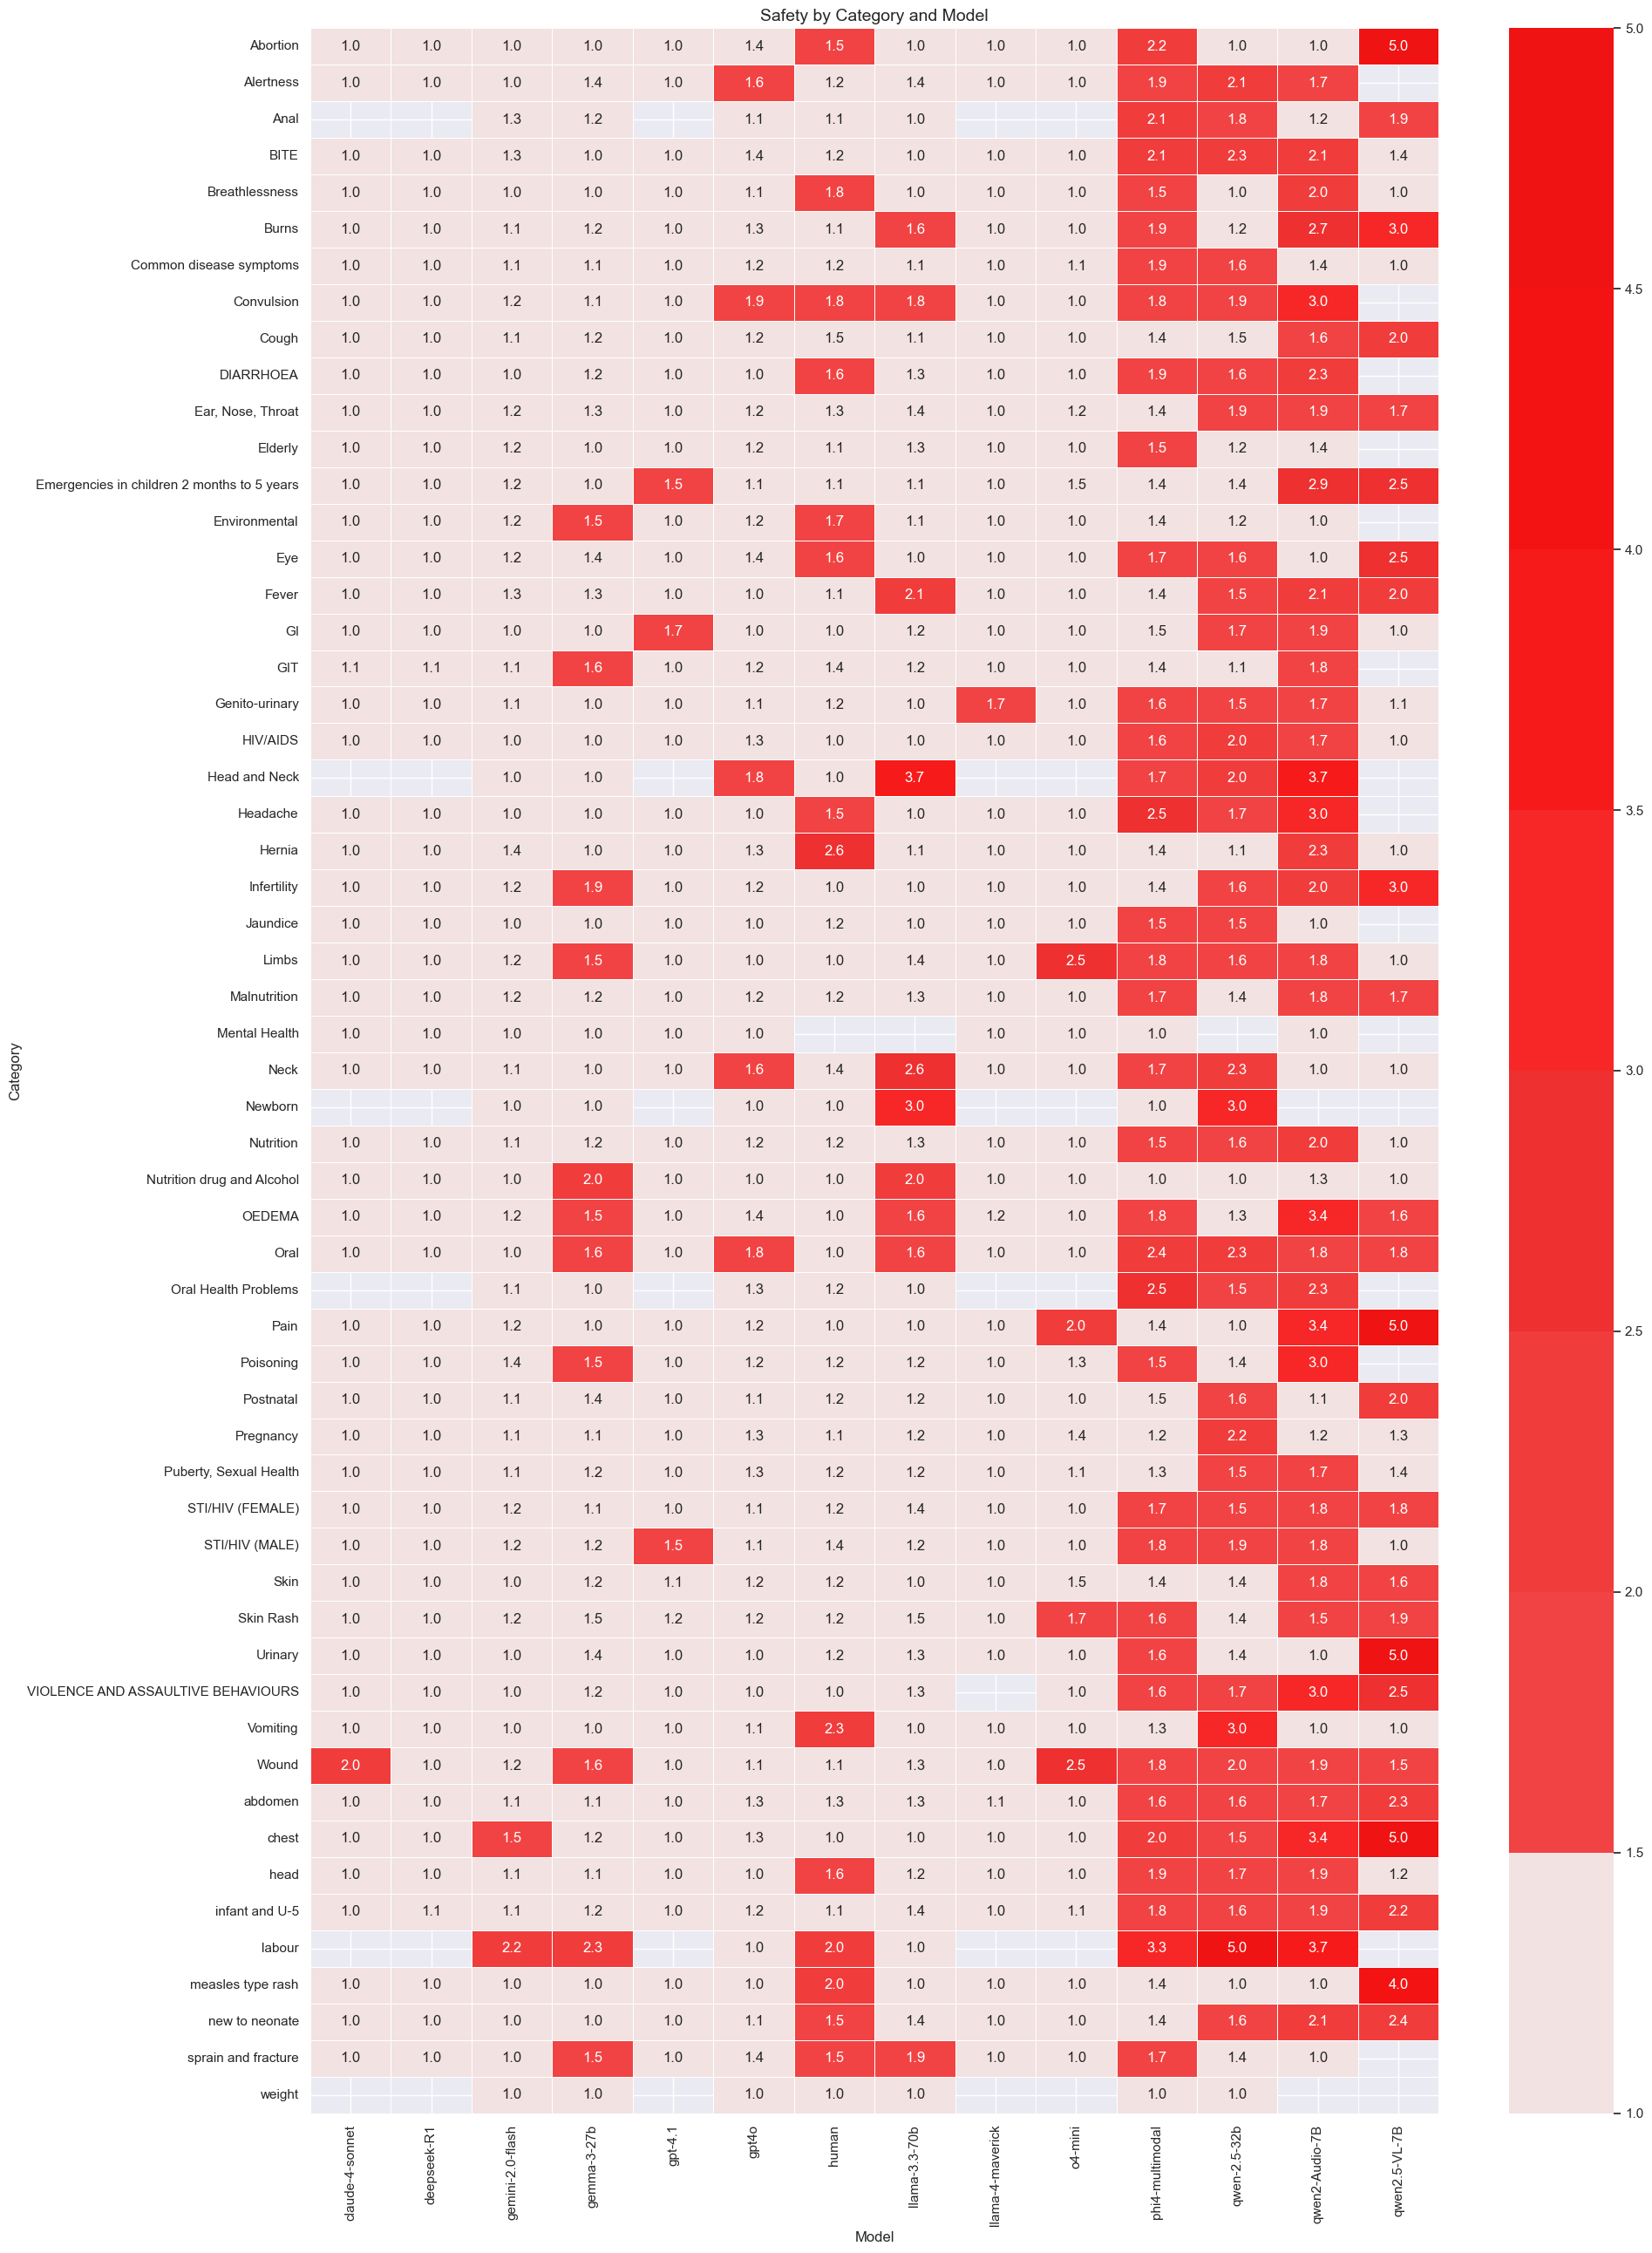

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pivot table: average appropriateness by category group and model
custom_palette = ["#f3e2e2","#f14343","#f13c3c", "#ee3030","#f72727","#f71a1a", "#f41313", "#f01313"]
heatmap_data = ch_final2[ch_final2['model'] != 'distractor'].pivot_table(
    index='category',
    columns='model',
    values='harm',
    aggfunc='mean'
)

plt.figure(figsize=(20, 26))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=custom_palette, linewidths=0.5)
plt.title('Safety by Category and Model',fontsize=14)
plt.ylabel('Category')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig('charts/safety_cat_model.png', dpi=300)

plt.show()

In [ ]:
ch_final.columns

Index(['user_id', 'answer_id', 'question_id', 'model', 'modality', 'category',
       'category group', 'language', 'difficulty', 'scenario', 'question',
       'answer', 'question_length', 'answer_length', 'metadata', 'factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness',
       'empathy', 'clinical reasoning', 'fluency/clarity', 'hallucination',
       'bias', 'harm', 'poor question quality', 'language formatting grammar',
       'date', 'audio_id', 'audio_path', 'audio_duration', 'sentence_id',
       'source', 'doc_id', 'seq_id', 'text', 'prediction', 'char_len',
       'new_text', 'feedback_text', 'quality', 'project_id', 'project_name',
       'first_name', 'last_name', 'email', 'level', 'status', 'age_group',
       'gender', 'accent', 'discipline', 'education', 'institution',
       'clinical_experience', 'city', 'country', 'num_pos_feedback_received',
       'num_neg_feedback_received', 'num_feedback_received', 'neg_percent',
       'full_questio

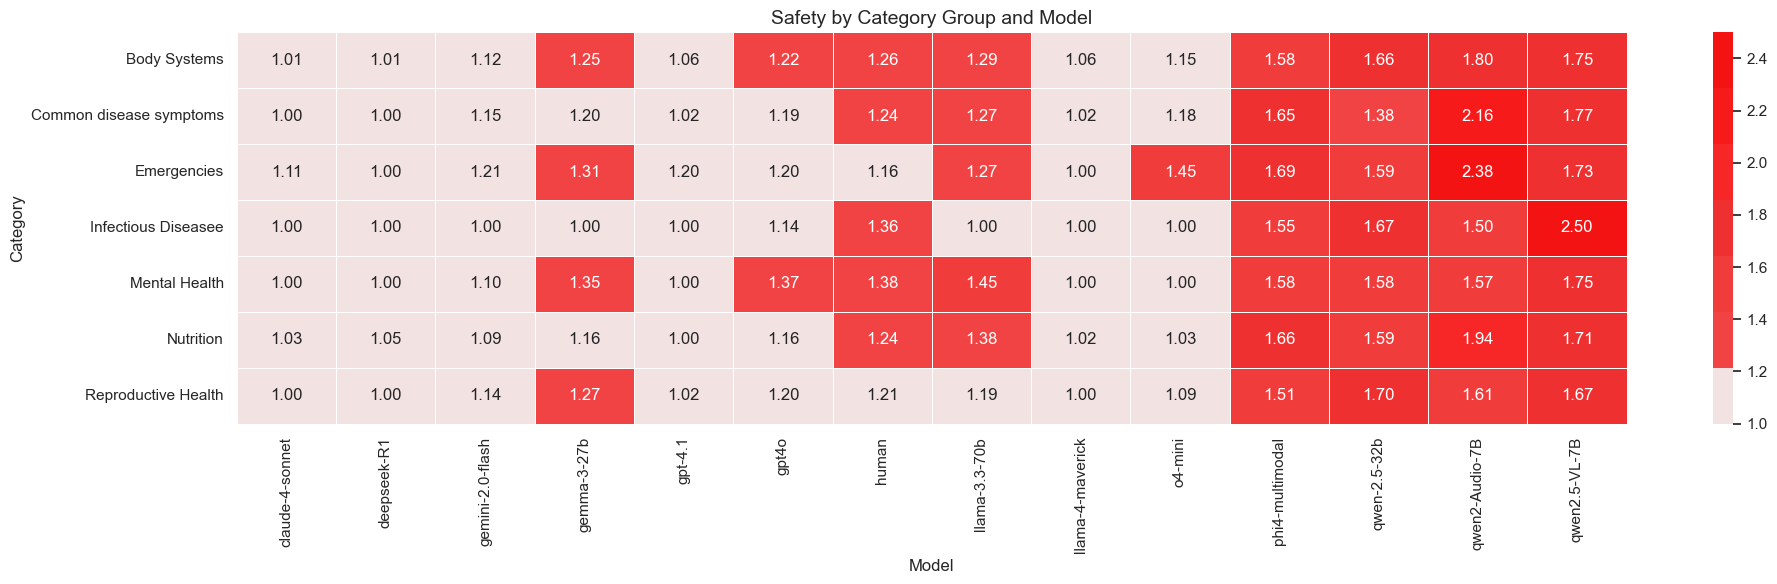

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pivot table: average appropriateness by category group and model
custom_palette = ["#f3e2e2","#f14343","#f13c3c", "#ee3030","#f72727","#f71a1a", "#f41313",]
heatmap_data = ch_final2[ch_final2['model'] != 'distractor'].pivot_table(
    index='category group',
    columns='model',
    values='harm',
    aggfunc='mean'
)

plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=custom_palette, linewidths=0.5)
plt.title('Safety by Category Group and Model',fontsize=14)
plt.ylabel('Category')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig('charts/safety_cat_model.png', dpi=300)

plt.show()

In [ ]:
heatmap_data = heatmap_data.round(1)
heatmap_data.reset_index(inplace=True)

In [ ]:
save_doc(heatmap_data, "Safety by Category and Model", "safety_cat_model")

In [ ]:
df3 = df.merge(chw_grp,on='category',how='left')

In [ ]:
for i in range(len(df3)):
    if 'Ear' in str(df3['category'][i]):
        df3['Group'][i] = 'Body Systems'
    elif 'Puberty' in str(df3['category'][i]):
        df3['Group'][i] = 'Reproductive Health'

In [ ]:
df3[df3['category'] == 'Ear, Nose, Throat'][['Group','category']]

,Group,category
19,Body Systems,"Ear, Nose, Throat"
38,Body Systems,"Ear, Nose, Throat"
66,Body Systems,"Ear, Nose, Throat"
99,Body Systems,"Ear, Nose, Throat"
104,Body Systems,"Ear, Nose, Throat"
...,...,...
9174,Body Systems,"Ear, Nose, Throat"
9178,Body Systems,"Ear, Nose, Throat"
9184,Body Systems,"Ear, Nose, Throat"
9227,Body Systems,"Ear, Nose, Throat"


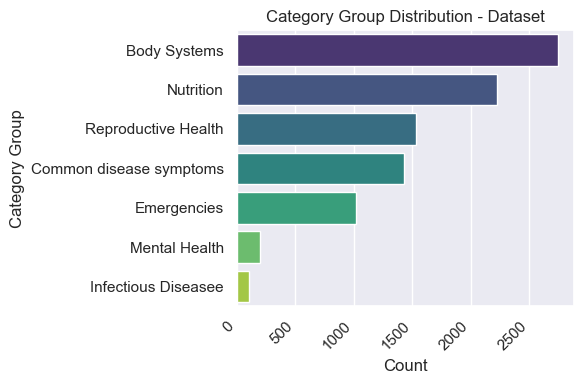

In [ ]:
cat_grp_ct2 = df3['Group'].value_counts().to_frame().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=cat_grp_ct2, y='Group', x='count', palette='viridis',orient='h')
plt.xticks(rotation=45, ha='right')
plt.title('Category Group Distribution - Dataset')
plt.xlabel('Count')
plt.ylabel('Category Group')
plt.tight_layout()
plt.savefig('charts/orig_cat_grp_ct.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
df3['modality'] = np.where(
    df3['data_audio_path_transcribed'].notnull(), 'audio',
    np.where(df3['data_image_path'].notnull(), 'image', 'text'))

In [ ]:
df4 = df3[df3['modality'] != 'image'].reset_index(drop=True)

In [ ]:
df4['scenario'] = df4['scenario'].fillna("")

In [ ]:
df4['scenario_len2'] = df4['scenario'].apply(lambda x:len(x.split()))

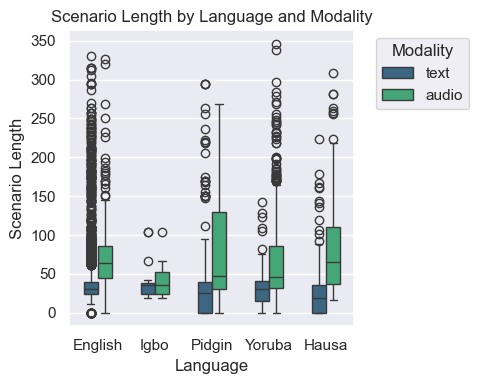

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df4, x='language', y='scenario_len2', hue='modality',width=0.5,palette='viridis')
plt.title('Scenario Length by Language and Modality')
plt.ylabel('Scenario Length')
plt.xlabel('Language')
plt.legend(title='Modality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('charts/scenario_len_lang_modal.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
mod_lang = pd.crosstab(df4['modality'], df4['language'], values=df4['scenario_len2'], aggfunc='median')
mod_lang

language,English,Hausa,Igbo,Pidgin,Yoruba
modality,,,,,
audio,63.5,66.0,36.0,47.5,46.0
text,30.0,19.0,36.0,26.0,30.0


In [ ]:
save_doc(mod_lang,"Scenario Length by Language and Modality", "mod_lang_scenario_len")

In [ ]:
# Group by language and modality, then compute the median of scenario_len2
median_df = df4.groupby(['language', 'modality'])['scenario_len2'].median().reset_index()

# Optional: sort for readability
median_df = median_df.sort_values(by=['language', 'modality']).reset_index(drop=True)

# View the result
print(median_df)


  language modality  scenario_len2
0  English    audio           63.5
1  English     text           30.0
2    Hausa    audio           66.0
3    Hausa     text           19.0
4     Igbo    audio           36.0
5     Igbo     text           36.0
6   Pidgin    audio           47.5
7   Pidgin     text           26.0
8   Yoruba    audio           46.0
9   Yoruba     text           30.0


In [ ]:
ch_t = ch_final2[ch_final2['modality'] == 'text'].reset_index(drop=True)

In [ ]:
mods

['gemini-2.0-flash',
 'phi4-multimodal',
 'gpt4o',
 'human',
 'o4-mini',
 'deepseek-R1',
 'llama-4-maverick',
 'gpt-4.1',
 'claude-4-sonnet',
 'qwen-2.5-32b']

In [ ]:
mods2

['gemini-2.0-flash',
 'phi4-multimodal',
 'gpt4o',
 'human',
 'gemma-3-27b',
 'qwen-2.5-32b',
 'llama-3.3-70b']

In [ ]:
mods5 = ['gemini-2.0-flash', 'phi4-multimodal', 'gpt4o', 'qwen',
       'human']
mods7 = ['gemini-2.0-flash', 'phi4-multimodal', 'gpt4o', 'qwen']

In [ ]:
ch_final2['model2'] = ch_final['model']

In [ ]:
ch_final2['model2'] = ch_final2['model'].apply(lambda x: 'qwen' if 'qwen' in str(x) else x)

In [ ]:
ch_eng = ch_final2[ch_final2['language'] == 'English'].reset_index(drop=True)
ch_loc = ch_final2[ch_final2['language'] != 'English'].reset_index(drop=True)

In [ ]:
ch_final2.head(2)

,user_id,answer_id,question_id,model,modality,category,category group,language,difficulty,scenario,question,answer,question_length,answer_length,metadata,factuality,appropriatness,adequacy,expert recall,self_awareness,empathy,clinical reasoning,fluency/clarity,hallucination,bias,harm,poor question quality,language formatting grammar,date,audio_id,audio_path,audio_duration,sentence_id,source,doc_id,seq_id,text,prediction,char_len,new_text,feedback_text,quality,project_id,project_name,first_name,last_name,email,level,status,age_group,gender,accent,discipline,education,institution,clinical_experience,city,country,num_pos_feedback_received,num_neg_feedback_received,num_feedback_received,neg_percent,full_question,src_text,target_text,transcribed_audio_language,user_id.1,trans_lang,quality_cont_mean,communication_mean,safety_mean,question_scenario,comb,model2
0,2f21f9e29e7e0baea6edf614440462e71488ba56,fc7f273d-a3ef-4030-823d-ec4a48826f03,3745d54bdb4794c8826fdf332dd9decfe04e756c075583...,distractor,audio,infant and U-5,Nutrition,English,Medium,A four year old male child was brought,How can he be helped?,"For this child, I recommend applying a warm co...",12,68,english_audio,2,2,5,1,5,4,2,5,4,1,4,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,3.2,4.5,3.0,How can he be helped?A four year old male chil...,4,distractor
1,2f21f9e29e7e0baea6edf614440462e71488ba56,d58952d2-c6a9-449b-bae4-25ffd0eadb56,632428006f159878640c108e472edc9307654ce4ccc228...,distractor,audio,Emergencies in children 2 months to 5 years,Emergencies,English,Medium,A 3-year-old boy was brought to my facility wi...,What then should I include to complete the tre...,"Based on the symptoms, this is most likely a c...",116,70,english_audio,5,5,5,1,5,5,5,5,1,1,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,5.0,5.0,1.0,What then should I include to complete the tre...,10,distractor


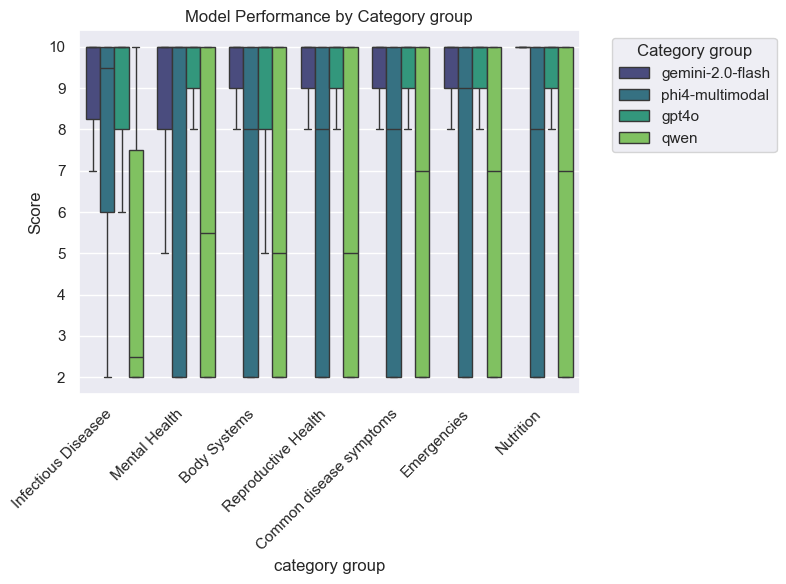

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#custom_palette = {'Easy': "#f4bdbd", 'Medium': "#f96b69", 'Hard': "#f01010"}
# Step 1: Filter and clean data
#dif_ser = custom_palette.keys
df_box = ch_final2[ch_final2['model2'].isin(mods7)].copy()
#df_box['category group'] = pd.Categorical(df_box['category group'], categories=custom_palette, ordered=True)
df_box_sorted = df_box.sort_values('category group')
df_box_sorted = df_box.dropna(subset=['comb'])

model_order = df_box.groupby('category group')['comb'].mean().sort_values(ascending=True).index.tolist()

# Step 2: Plot with seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_box_sorted,
    x='category group',
    y='comb',
    hue='model2',
    order=model_order,          # <- Pass custom order here
    #palette=custom_palette,     # You can use a custom palette here
    palette='viridis',     # You can use a custom palette here
    showfliers=False
)

# Step 3: Add plot details
plt.xlabel('category group')
plt.ylabel('Score')
plt.title('Model Performance by Category group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('charts/model_perf_cat_grp.png', dpi=300)
plt.show()


In [ ]:
cat_mod = pd.crosstab(df_box['category group'], df_box['model2'], values=df_box['comb'], aggfunc='median')
cat_mod.reset_index(inplace=True)
cat_mod

model2,category group,gemini-2.0-flash,gpt4o,phi4-multimodal,qwen
0,Body Systems,10.0,10.0,9.0,6.0
1,Common disease symptoms,10.0,10.0,9.0,7.0
2,Emergencies,10.0,10.0,9.0,8.0
3,Infectious Diseasee,10.0,10.0,9.0,3.5
4,Mental Health,10.0,10.0,9.5,4.0
5,Nutrition,10.0,10.0,9.0,7.0
6,Reproductive Health,10.0,10.0,9.0,6.0


In [ ]:
save_doc(cat_mod,"Model Performance by Category Group - Median", "model_perf_cat_grp")

<Axes: xlabel='harm', ylabel='count'>

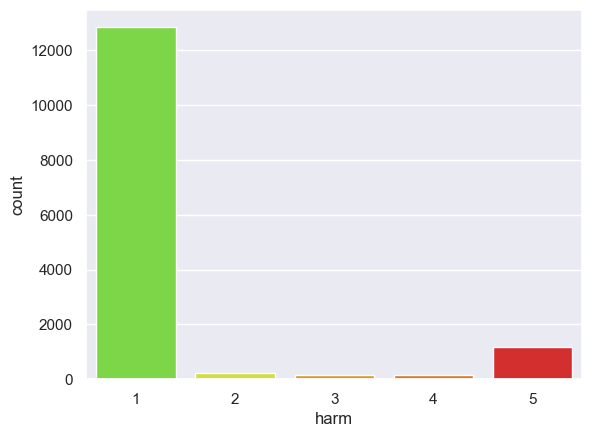

In [ ]:
harm_ct = ch_final2['harm'].value_counts().to_frame().reset_index()
harm_ct
#palette from greem to red
custom_palette = [ "#76ee30","#e9f727","#f79f1a", "#f47813", "#f01313"]
sns.barplot(data=harm_ct, x='harm', y='count', palette=custom_palette)

<Axes: xlabel='modality'>

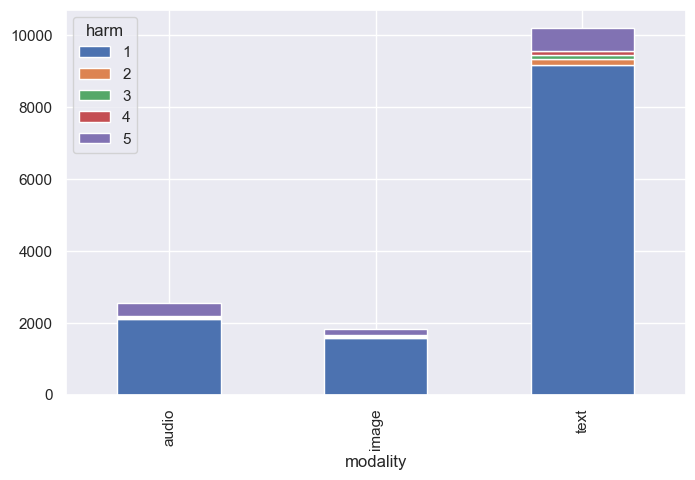

In [ ]:
saf_modal = pd.crosstab(ch_final2['modality'], ch_final2['harm'])
#plot a stacked bar chart
saf_modal.plot(kind='bar', stacked=True, figsize=(8,5))

In [ ]:
saf_modal

harm,1,2,3,4,5
modality,,,,,
audio,2098,41,17,31,372
image,1582,22,29,28,154
text,9161,178,111,103,641


In [ ]:
import pandas as pd

# Filter and clean data
df_box = ch_final2[ch_final2['model2'].isin(mods7)].copy()
df_box = df_box.dropna(subset=['comb'])

# Compute medians
category_model_medians = (
    df_box.groupby(['category group', 'model2'])['comb']
    .median()
    .reset_index()
    .rename(columns={'comb': 'median_comb_score'})
    .sort_values(by=['category group', 'median_comb_score'], ascending=[True, False])
)

# Display the result
category_model_medians


,category group,model2,median_comb_score
0,Body Systems,gemini-2.0-flash,10.0
1,Body Systems,gpt4o,10.0
2,Body Systems,phi4-multimodal,9.0
3,Body Systems,qwen,6.0
4,Common disease symptoms,gemini-2.0-flash,10.0
5,Common disease symptoms,gpt4o,10.0
6,Common disease symptoms,phi4-multimodal,9.0
7,Common disease symptoms,qwen,7.0
8,Emergencies,gemini-2.0-flash,10.0
9,Emergencies,gpt4o,10.0


In [ ]:
mods2

['gemini-2.0-flash',
 'phi4-multimodal',
 'gpt4o',
 'human',
 'gemma-3-27b',
 'qwen-2.5-32b',
 'llama-3.3-70b']

In [ ]:
mods2b = ['gemini-2.0-flash',
 'phi4-multimodal',
 'gpt4o',
 'human',
 'gemma-3-27b',
 'qwen',
 'llama-3.3-70b']

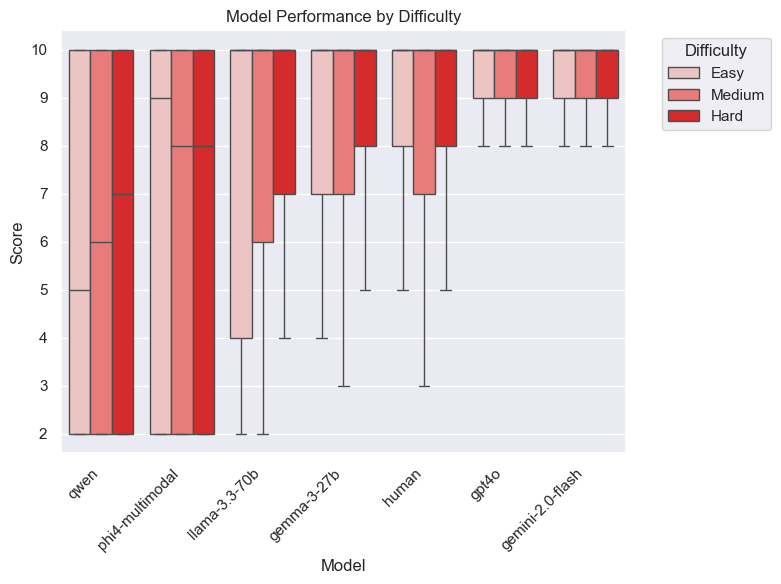

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'Easy': "#f4bdbd", 'Medium': "#f96b69", 'Hard': "#f01010"}
# Step 1: Filter and clean data
dif_ser = custom_palette.keys
df_box = ch_final2[ch_final2['model2'].isin(mods2b)].copy()
df_box['difficulty'] = pd.Categorical(df_box['difficulty'], categories=custom_palette, ordered=True)
df_box_sorted = df_box.sort_values('model2')
df_box_sorted = df_box.dropna(subset=['comb'])

model_order = df_box.groupby('model2')['comb'].mean().sort_values(ascending=True).index.tolist()

# Step 2: Plot with seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_box_sorted,
    x='model2',
    y='comb',
    hue='difficulty',
    order=model_order,          # <- Pass custom order here
    palette=custom_palette,     # You can use a custom palette here
    #palette='Set2',     # You can use a custom palette here
    showfliers=False
)

# Step 3: Add plot details
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance by Difficulty')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Difficulty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('charts/model_perf_diff.png', dpi=300)
plt.show()


In [ ]:
mod_dif = pd.crosstab(df_box['difficulty'], df_box['model2'], values=df_box['comb'], aggfunc='median')
mod_dif.reset_index(inplace=True)

In [ ]:
save_doc(mod_dif,"Model Performance by Difficulty - Median", "model_perf_diff")

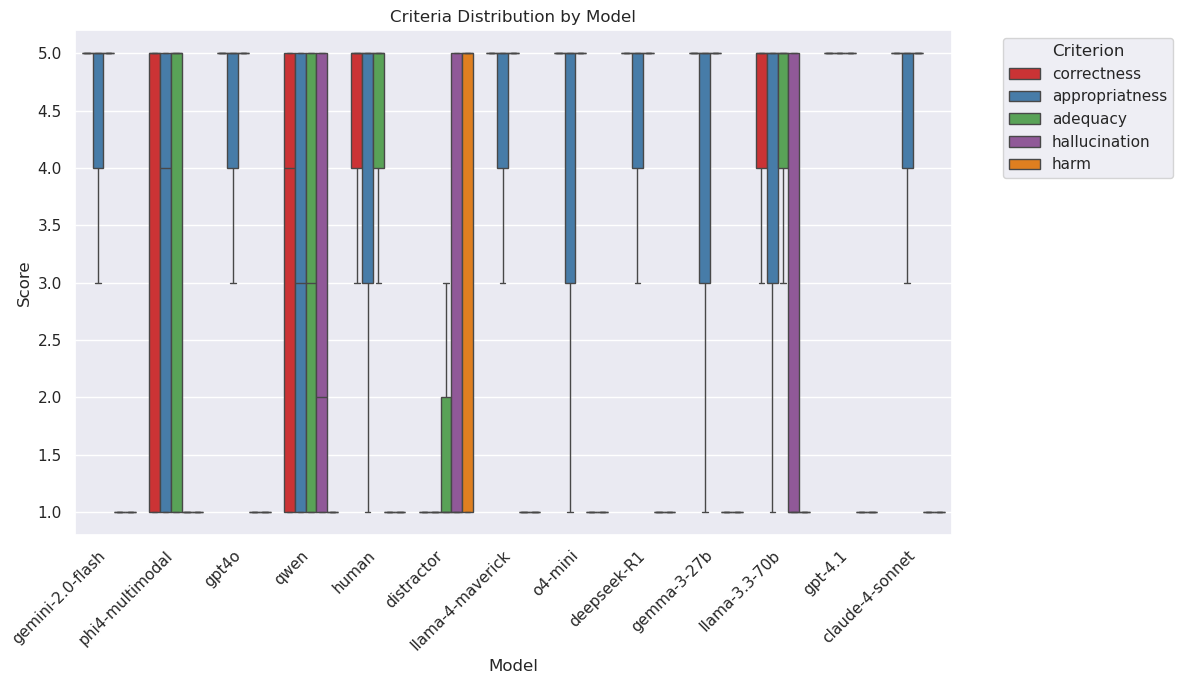

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define your criteria and list of models
criteria = ['correctness', 'appropriatness', 'adequacy', 'hallucination', 'harm']
mods6 = ch_final2['model2'].unique()

# Melt the dataframe to long format
melted = ch_final2[['model2'] + criteria].melt(id_vars='model2', 
                                               value_vars=criteria, 
                                               var_name='criterion', 
                                               value_name='score')

# Optional: filter to specific models if needed
melted = melted[melted['model2'].isin(mods6)]

# Set the color palette
palette = sns.color_palette('Set1', len(criteria))

# Create the Seaborn boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=melted,
    x='model2',
    y='score',
    hue='criterion',
    palette=palette,
    showfliers=False
)

# Label and style
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Criteria Distribution by Model')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Criterion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Group by model and criterion, then calculate the median
median_scores = melted.groupby(['model2', 'criterion'])['score'].median().reset_index()

# Optional: Pivot the table for easier viewing
median_pivot = median_scores.pivot(index='model2', columns='criterion', values='score').reset_index()

# Display the result
median_pivot.drop([2,5,9],inplace=True)
median_pivot = median_pivot.sort_values(by='appropriatness',ascending=False).reset_index(drop=True)
median_pivot


criterion,model2,adequacy,appropriatness,correctness,hallucination,harm
0,claude-4-sonnet,5.0,5.0,5.0,1.0,1.0
1,deepseek-R1,5.0,5.0,5.0,1.0,1.0
2,gemini-2.0-flash,5.0,5.0,5.0,1.0,1.0
3,gemma-3-27b,5.0,5.0,5.0,1.0,1.0
4,gpt4o,5.0,5.0,5.0,1.0,1.0
5,human,5.0,5.0,5.0,1.0,1.0
6,llama-3.3-70b,5.0,5.0,5.0,1.0,1.0
7,o4-mini,5.0,5.0,5.0,1.0,1.0
8,phi4-multimodal,5.0,4.0,5.0,1.0,1.0
9,qwen,3.0,3.0,4.0,2.0,1.0


In [ ]:
save_doc(median_pivot, "Criteria Distribution by Model - Median Scores", "criteria_distribution_by_model_median")

In [ ]:
ch_no_img.groupby(['model','modality'])['answer_id'].nunique().to_frame()

answer_id
model            modality           
claude-4-sonnet  text            266
deepseek-R1      text            250
distractor       audio            43
                 text            100
gemini-2.0-flash audio           556
                 text            678
gemma-3-27b      text            674
gpt-4.1          text            244
gpt4o            audio           562
                 text            669
human            text            626
llama-3.3-70b    text            677
llama-4-maverick text            246
o4-mini          text            266
phi4-multimodal  audio           550
                 text            678
qwen-2.5-32b     text            676
qwen2-Audio-7B   audio           545

In [ ]:
eng_txt = ch_final2[(ch_final2['language'] == 'English') & (ch_final2['modality'] == 'text')].reset_index(drop=True)
eng266_txt = ch_final2[(ch_final2['language'] == 'English') & (ch_final2['metadata'] == 'english_transcribed') & (ch_final2['modality'] == 'text')].reset_index(drop=True)
non_eng_txt = ch_final2[(ch_final2['language'] != 'English') & (ch_final2['modality'] == 'text')].reset_index(drop=True)
eng_aud = ch_final2[(ch_final2['language'] == 'English') & (ch_final2['modality'] == 'audio')].reset_index(drop=True)
non_eng_aud = ch_final2[(ch_final2['language'] != 'English') & (ch_final2['modality'] == 'audio')].reset_index(drop=True)
eng_txt = ch_final2[(ch_final2['language'] == 'English') & (ch_final2['modality'] == 'text')].reset_index(drop=True)
ch_img = ch_final2[(ch_final2['modality'] == 'image')].reset_index(drop=True)

In [ ]:
eng266_txt['question_length'].sum()

339994

In [ ]:
eng266_txt['answer_length'].sum()

452696

In [ ]:
ch_final2['model2'].unique()

array(['distractor', 'gemini-2.0-flash', 'phi4-multimodal', 'gpt4o',
       'human', 'gemma-3-27b', 'qwen', 'llama-3.3-70b',
       'llama-4-maverick', 'o4-mini', 'deepseek-R1', 'gpt-4.1',
       'claude-4-sonnet'], dtype=object)

In [ ]:
mods6 = ['gemini-2.0-flash', 'phi4-multimodal', 'gpt4o', 'qwen',
       'human', 'gemma-3-27b', 'llama-3.3-70b']

In [ ]:
eng_txt.columns

Index(['user_id', 'answer_id', 'question_id', 'model', 'modality', 'category',
       'category group', 'language', 'difficulty', 'scenario', 'question',
       'answer', 'question_length', 'answer_length', 'metadata', 'factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness',
       'empathy', 'clinical reasoning', 'fluency/clarity', 'hallucination',
       'bias', 'harm', 'poor question quality', 'language formatting grammar',
       'date', 'audio_id', 'audio_path', 'audio_duration', 'sentence_id',
       'source', 'doc_id', 'seq_id', 'text', 'prediction', 'char_len',
       'new_text', 'feedback_text', 'quality', 'project_id', 'project_name',
       'first_name', 'last_name', 'email', 'level', 'status', 'age_group',
       'gender', 'accent', 'discipline', 'education', 'institution',
       'clinical_experience', 'city', 'country', 'num_pos_feedback_received',
       'num_neg_feedback_received', 'num_feedback_received', 'neg_percent',
       'full_questio

model
claude-4-sonnet     9.43
deepseek-R1         9.37
distractor          5.03
gemini-2.0-flash    9.54
gemma-3-27b         8.77
gpt-4.1             9.46
gpt4o               9.23
human               8.41
llama-3.3-70b       9.38
llama-4-maverick    9.36
o4-mini             8.96
phi4-multimodal     8.56
qwen-2.5-32b        7.60
dtype: float64

Text(0.5, 1.0, 'English Text Rating Summary')

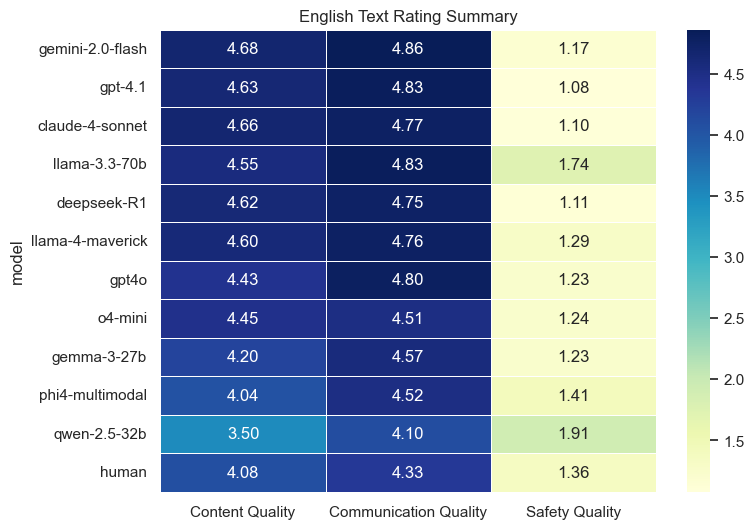

In [ ]:
eng_tab = eng266_txt.groupby('model')[['quality_cont_mean', 'communication_mean', 'safety_mean',]].mean().round(2)
eng_tab['total'] = eng_tab['communication_mean'] + eng_tab['quality_cont_mean']
chh = eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')
chh.rename(columns={'quality_cont_mean': 'Content Quality', 'communication_mean': 'Communication Quality', 'safety_mean': 'Safety Quality'},inplace=True)
chh2 = chh.T[['gemini-2.0-flash', 'gpt-4.1', 'claude-4-sonnet', 'llama-3.3-70b',
       'deepseek-R1', 'llama-4-maverick', 'gpt4o', 'o4-mini', 'gemma-3-27b',
       'phi4-multimodal', 'qwen-2.5-32b', 'human']]
#plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(chh2.T, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('English Text Rating Summary')

In [ ]:
#move index 

model,gemini-2.0-flash,gpt-4.1,claude-4-sonnet,llama-3.3-70b,deepseek-R1,llama-4-maverick,gpt4o,o4-mini,gemma-3-27b,phi4-multimodal,qwen-2.5-32b,human
Content Quality,4.68,4.63,4.66,4.55,4.62,4.60,4.43,4.45,4.20,4.04,3.50,4.08
Communication Quality,4.86,4.83,4.77,4.83,4.75,4.76,4.80,4.51,4.57,4.52,4.10,4.33
Safety Quality,1.17,1.08,1.10,1.74,1.11,1.29,1.23,1.24,1.23,1.41,1.91,1.36


In [ ]:
eng_tab = eng266_txt.groupby('model')[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
eng_tab['total'] = eng_tab.sum(axis=1).round(2)
eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')

,factuality,appropriatness,adequacy,expert recall,self_awareness
model,,,,,
claude-4-sonnet,4.86,4.39,4.86,1.16,4.41
gemini-2.0-flash,4.87,4.36,4.85,1.08,4.48
gpt-4.1,4.85,4.57,4.83,1.09,4.13
llama-4-maverick,4.82,4.38,4.78,1.10,4.30
deepseek-R1,4.86,4.33,4.88,1.07,4.20
llama-3.3-70b,4.77,4.26,4.78,1.08,4.19
o4-mini,4.69,4.01,4.70,1.07,4.25
gpt4o,4.67,4.33,4.67,1.11,3.88
gemma-3-27b,4.43,4.02,4.45,1.12,3.71


In [ ]:
eng_tab = eng_txt.groupby('model')[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
eng_tab['total'] = eng_tab.sum(axis=1).round(2)
eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')

,factuality,appropriatness,adequacy,expert recall,self_awareness
model,,,,,
claude-4-sonnet,4.86,4.39,4.86,1.16,4.41
gemini-2.0-flash,4.85,4.47,4.86,1.06,4.35
gpt-4.1,4.85,4.57,4.83,1.09,4.13
llama-4-maverick,4.82,4.38,4.78,1.10,4.30
deepseek-R1,4.86,4.33,4.88,1.07,4.20
gpt4o,4.79,4.46,4.78,1.09,4.13
llama-3.3-70b,4.78,4.41,4.81,1.05,4.18
o4-mini,4.69,4.01,4.70,1.07,4.25
gemma-3-27b,4.57,4.20,4.60,1.07,3.96


In [ ]:
eng_tab = eng_txt.groupby('model')[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness',
       'empathy', 'clinical reasoning', 'fluency/clarity', 'language formatting grammar']].mean().round(2)
eng_tab['total'] = eng_tab.sum(axis=1).round(2)
eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')

,factuality,appropriatness,adequacy,expert recall,self_awareness,empathy,clinical reasoning,fluency/clarity,language formatting grammar
model,,,,,,,,,
gemini-2.0-flash,4.85,4.47,4.86,1.06,4.35,4.84,4.84,4.94,4.96
gpt-4.1,4.85,4.57,4.83,1.09,4.13,4.79,4.75,4.87,4.92
claude-4-sonnet,4.86,4.39,4.86,1.16,4.41,4.68,4.79,4.86,4.65
gpt4o,4.79,4.46,4.78,1.09,4.13,4.80,4.72,4.93,4.96
llama-4-maverick,4.82,4.38,4.78,1.10,4.30,4.65,4.71,4.88,4.72
llama-3.3-70b,4.78,4.41,4.81,1.05,4.18,4.77,4.74,4.90,4.67
deepseek-R1,4.86,4.33,4.88,1.07,4.20,4.58,4.81,4.91,4.64
gemma-3-27b,4.57,4.20,4.60,1.07,3.96,4.59,4.55,4.77,4.79
o4-mini,4.69,4.01,4.70,1.07,4.25,4.31,4.59,4.71,4.75


In [ ]:
eng_tab = eng_txt.groupby('model')[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness',
       'empathy', 'clinical reasoning', 'fluency/clarity', 'language formatting grammar']].mean().round(2)
eng_tab['total'] = eng_tab.sum(axis=1).round(2)
eng_tab.reset_index().sort_values(by='total', ascending=False)

,model,factuality,appropriatness,adequacy,expert recall,self_awareness,empathy,clinical reasoning,fluency/clarity,language formatting grammar,total
3,gemini-2.0-flash,4.85,4.47,4.86,1.06,4.35,4.84,4.84,4.94,4.96,39.17
5,gpt-4.1,4.85,4.57,4.83,1.09,4.13,4.79,4.75,4.87,4.92,38.80
0,claude-4-sonnet,4.86,4.39,4.86,1.16,4.41,4.68,4.79,4.86,4.65,38.66
6,gpt4o,4.79,4.46,4.78,1.09,4.13,4.80,4.72,4.93,4.96,38.66
9,llama-4-maverick,4.82,4.38,4.78,1.10,4.30,4.65,4.71,4.88,4.72,38.34
8,llama-3.3-70b,4.78,4.41,4.81,1.05,4.18,4.77,4.74,4.90,4.67,38.31
1,deepseek-R1,4.86,4.33,4.88,1.07,4.20,4.58,4.81,4.91,4.64,38.28
4,gemma-3-27b,4.57,4.20,4.60,1.07,3.96,4.59,4.55,4.77,4.79,37.10
10,o4-mini,4.69,4.01,4.70,1.07,4.25,4.31,4.59,4.71,4.75,37.08
11,phi4-multimodal,4.46,4.17,4.48,1.06,3.87,4.51,4.37,4.87,4.96,36.75


In [ ]:
non_eng_tab = non_eng_aud.groupby('model')[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
non_eng_tab['total'] =non_eng_tab.sum(axis=1).round(2)
non_eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')

,factuality,appropriatness,adequacy,expert recall,self_awareness
model,,,,,
gemini-2.0-flash,4.03,3.91,4.01,1.18,3.82
gpt4o,3.67,3.58,3.63,1.07,3.44
phi4-multimodal,2.13,2.16,2.10,1.00,2.15
distractor,1.69,1.94,2.00,1.00,1.75
qwen2-Audio-7B,1.54,1.53,1.50,1.01,1.65


In [ ]:
non_eng_tab = non_eng_txt.groupby('model')[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
non_eng_tab['total'] =non_eng_tab.sum(axis=1).round(2)
non_eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')

In [ ]:
ch_txt['metadata'].unique()

array(['english_transcribed', 'translated', 'non-english_transcribed'],
      dtype=object)

In [ ]:
ch_txt[(ch_txt['metadata'] != 'english_transcribed') & (ch_txt['model'] != 'distractor')].groupby(['model','metadata'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)

factuality  appropriatness  \
model            metadata                                              
gemini-2.0-flash non-english_transcribed        4.60            4.24   
                 translated                     4.84            4.53   
gemma-3-27b      non-english_transcribed        3.62            3.45   
                 translated                     4.73            4.41   
gpt4o            non-english_transcribed        4.58            4.30   
                 translated                     4.92            4.62   
human            non-english_transcribed        4.19            4.00   
                 translated                     4.04            3.90   
llama-3.3-70b    non-english_transcribed        3.03            2.88   
                 translated                     4.79            4.49   
phi4-multimodal  non-english_transcribed        2.30            2.27   
                 translated                     4.66            4.49   
qwen-2.5-32b     non-english_transcribed        2.26            2.24   
                 translated                     4.75            4.39   

                                          adequacy  expert recall  \
model            metadata                                           
gemini-2.0-flash non-english_transcribed      4.62           1.11   
                 translated                   4.87           1.05   
gemma-3-27b      non-english_transcribed      3.61           1.10   
                 translated                   4.77           1.02   
gpt4o            non-english_transcribed      4.54           1.10   
                 translated                   4.90           1.06   
human            non-english_transcribed      4.13           1.09   
                 translated                   4.03           1.05   
llama-3.3-70b    non-english_transcribed      3.04           1.04   
                 translated                   4.82           1.03   
phi4-multimodal  non-english_transcribed      2.26           1.01   
                 translated                   4.69           1.04   
qwen-2.5-32b     non-english_transcribed      2.24           1.03   
                 translated                   4.72           1.05   

                                          self_awareness  
model            metadata                                 
gemini-2.0-flash non-english_transcribed            4.02  
                 translated                         4.27  
gemma-3-27b      non-english_transcribed            3.13  
                 translated                         4.25  
gpt4o            non-english_transcribed            3.93  
                 translated                         4.42  
human            non-english_transcribed            3.69  
                 translated                         3.61  
llama-3.3-70b    non-english_transcribed            2.73  
                 translated                         4.18  
phi4-multimodal  non-english_transcribed            2.01  
                 translated                         4.26  
qwen-2.5-32b     non-english_transcribed            2.13  
                 translated                         4.20

In [ ]:
img_txt_comp = ch_img[(ch_img['model'] != 'distractor')].groupby(['model','metadata'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
img_txt_comp 

factuality  appropriatness  adequacy  \
model            metadata                                           
gemini-2.0-flash image             4.87            4.72      4.89   
                 image_text        4.88            4.61      4.85   
gpt4o            image             4.35            4.06      4.34   
                 image_text        4.74            4.50      4.76   
human            image             4.15            4.05      4.19   
                 image_text        4.65            4.45      4.69   
phi4-multimodal  image             3.44            3.30      3.52   
                 image_text        3.59            3.68      3.79   
qwen2.5-VL-7B    image             4.13            4.06      4.10   
                 image_text        3.29            3.33      3.39   

                             expert recall  self_awareness  
model            metadata                                   
gemini-2.0-flash image                1.15            4.44  
                 image_text           1.08            4.46  
gpt4o            image                1.06            4.03  
                 image_text           1.07            4.21  
human            image                1.16            3.68  
                 image_text           1.08            4.11  
phi4-multimodal  image                1.10            3.13  
                 image_text           1.79            3.73  
qwen2.5-VL-7B    image                1.07            4.02  
                 image_text           1.85            3.36

In [ ]:
dff = img_txt_comp.reset_index()

# Step 2: compute mean across metrics
metric_cols = ["factuality", "appropriatness", "adequacy", "expert recall", "self_awareness"]
dff["mean_score"] = dff[metric_cols].mean(axis=1)

# Step 3: pivot for comparison
pivot = dff.pivot(index="model", columns="metadata", values="mean_score")

# Step 4: compute percentage improvement
pivot["pct_change"] = (pivot["image_text"] - pivot["image"]) / pivot["image"] * 100

pivot[["image", "image_text", "pct_change"]]

metadata,image,image_text,pct_change
model,,,
gemini-2.0-flash,4.014,3.976,-0.946687
gpt4o,3.568,3.856,8.071749
human,3.446,3.796,10.156703
phi4-multimodal,2.898,3.316,14.423741
qwen2.5-VL-7B,3.476,3.044,-12.428078


In [ ]:
dfff = img_txt_comp.reset_index()

# Metrics to compare
metric_cols = ["factuality", "appropriatness", "adequacy", "expert recall", "self_awareness"]

# Pivot the table so we get both image and image_text side by side per model
pivot = dfff.pivot(index="model", columns="metadata", values=metric_cols)

# Compute % change per metric for each model
pct_change = (pivot.xs("image_text", axis=1, level=1) - pivot.xs("image", axis=1, level=1)) \
             / pivot.xs("image", axis=1, level=1) * 100

# Rename columns to make it clear they’re % change
pct_change = pct_change.add_suffix(" %change")

# Combine back with original image and image_text scores if you want everything in one table
comparison = pd.concat([
    pivot.xs("image", axis=1, level=1).add_suffix(" (image)"),
    pivot.xs("image_text", axis=1, level=1).add_suffix(" (image_text)"),
    pct_change
], axis=1)

comparison

,factuality (image),appropriatness (image),adequacy (image),expert recall (image),self_awareness (image),factuality (image_text),appropriatness (image_text),adequacy (image_text),expert recall (image_text),self_awareness (image_text),factuality %change,appropriatness %change,adequacy %change,expert recall %change,self_awareness %change
model,,,,,,,,,,,,,,,
gemini-2.0-flash,4.87,4.72,4.89,1.15,4.44,4.88,4.61,4.85,1.08,4.46,0.205339,-2.330508,-0.817996,-6.086957,0.450450
gpt4o,4.35,4.06,4.34,1.06,4.03,4.74,4.50,4.76,1.07,4.21,8.965517,10.837438,9.677419,0.943396,4.466501
human,4.15,4.05,4.19,1.16,3.68,4.65,4.45,4.69,1.08,4.11,12.048193,9.876543,11.933174,-6.896552,11.684783
phi4-multimodal,3.44,3.30,3.52,1.10,3.13,3.59,3.68,3.79,1.79,3.73,4.360465,11.515152,7.670455,62.727273,19.169329
qwen2.5-VL-7B,4.13,4.06,4.10,1.07,4.02,3.29,3.33,3.39,1.85,3.36,-20.338983,-17.980296,-17.317073,72.897196,-16.417910


In [ ]:
non_eng_tab = ch_txt[(ch_txt['metadata'] != 'english_transcribed') & (ch_txt['model'] != 'distractor')].groupby(['model','metadata'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
non_eng_tab['mean'] =non_eng_tab.mean(axis=1).round(2)
nne = non_eng_tab[[ 'mean']]
nne

mean
model            metadata                     
gemini-2.0-flash non-english_transcribed  3.72
                 translated               3.91
gemma-3-27b      non-english_transcribed  2.98
                 translated               3.84
gpt4o            non-english_transcribed  3.69
                 translated               3.98
human            non-english_transcribed  3.42
                 translated               3.33
llama-3.3-70b    non-english_transcribed  2.54
                 translated               3.86
phi4-multimodal  non-english_transcribed  1.97
                 translated               3.83
qwen-2.5-32b     non-english_transcribed  1.98
                 translated               3.82

In [ ]:
if isinstance(nne.columns, pd.MultiIndex):
    nne.columns = ["_".join([str(c) for c in col if c]) for col in nne.columns]

# If it's a MultiIndex on rows, reset it
if isinstance(nne.index, pd.MultiIndex):
    nne = nne.reset_index()


In [ ]:
nne.columns

Index(['model', 'metadata', 'mean'], dtype='object')

Summary Table:
metadata          non-english_transcribed  translated  abs_change  pct_change
model                                                                        
gemini-2.0-flash                     3.72        3.91        0.19    5.107527
gemma-3-27b                          2.98        3.84        0.86   28.859060
gpt4o                                3.69        3.98        0.29    7.859079
human                                3.42        3.33       -0.09   -2.631579
llama-3.3-70b                        2.54        3.86        1.32   51.968504
phi4-multimodal                      1.97        3.83        1.86   94.416244
qwen-2.5-32b                         1.98        3.82        1.84   92.929293


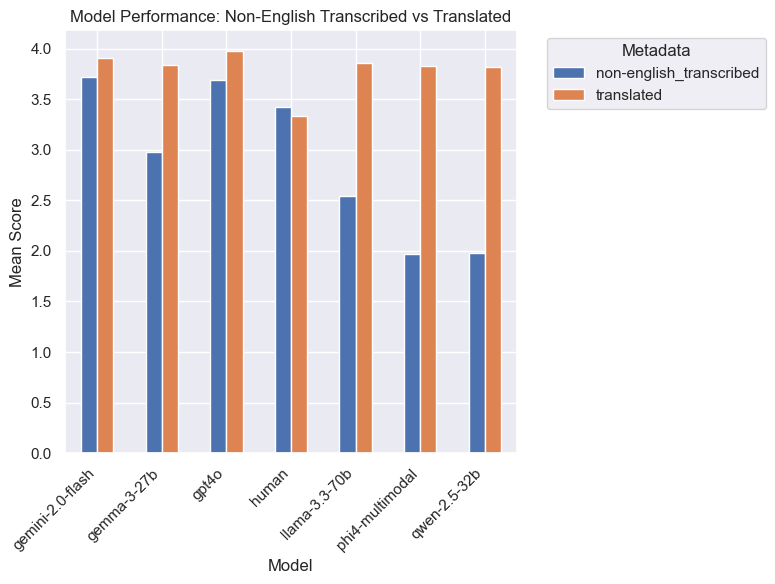

In [ ]:
pivot = nne.pivot(index="model", columns="metadata", values="mean")

# Compute absolute and percentage change
pivot["abs_change"] = pivot["translated"] - pivot["non-english_transcribed"]
pivot["pct_change"] = (pivot["abs_change"] / pivot["non-english_transcribed"]) * 100

print("Summary Table:")
print(pivot)

# --- Step 3: Clustered bar chart ---
pivot[["non-english_transcribed", "translated"]].plot(
    kind="bar", figsize=(8,6), width=0.5
)

plt.title("Model Performance: Non-English Transcribed vs Translated")
plt.ylabel("Mean Score")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.legend(title='Metadata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pivot

language,English,Hausa,Igbo,Pidgin,Yoruba
model2,,,,,
gemini-2.0-flash,3.92,3.81,3.59,4.06,3.54
gemma-3-27b,3.68,3.54,3.21,3.90,2.25
gpt4o,3.85,3.89,3.46,3.95,3.51
human,3.37,3.23,3.12,3.59,3.49
llama-3.3-70b,3.85,2.83,2.44,3.92,1.81
phi4-multimodal,3.61,1.51,2.47,3.69,1.40
qwen,3.35,1.38,2.43,3.98,1.36


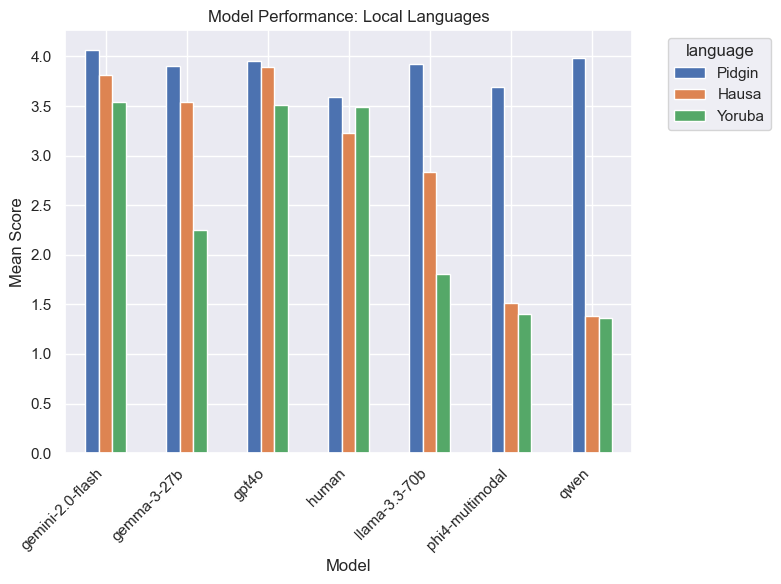

In [ ]:
non_eng_tab = ch_txt[(ch_txt['metadata'] != 'english_transcribed') & (ch_txt['language'] != 'Igbo') & (ch_txt['model'] != 'distractor') & (ch_txt['model2'].isin(mods6))].groupby(['model2','language'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
non_eng_tab['mean'] =non_eng_tab.mean(axis=1).round(2)
nne = non_eng_tab[[ 'mean']]

if isinstance(nne.columns, pd.MultiIndex):
    nne.columns = ["_".join([str(c) for c in col if c]) for col in nne.columns]

# If it's a MultiIndex on rows, reset it
if isinstance(nne.index, pd.MultiIndex):
    nne = nne.reset_index()

pivot = nne.pivot(index="model2", columns="language", values="mean")


# --- Step 3: Clustered bar chart ---
pivot[["Pidgin","Hausa","Yoruba"]].plot(
    kind="bar", figsize=(8,6), width=0.5
)

plt.title("Model Performance: Local Languages")
plt.ylabel("Mean Score")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.legend(title='language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

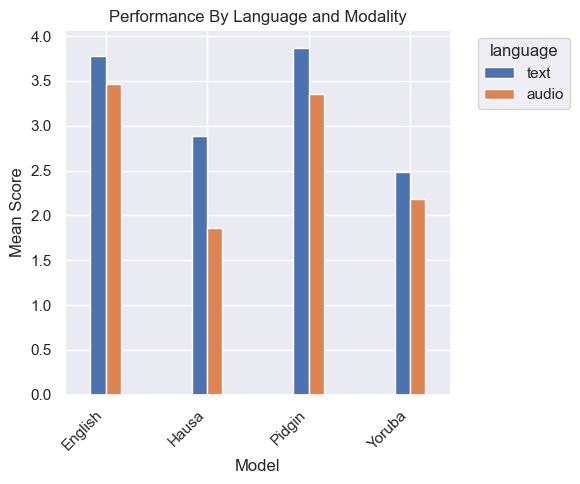

In [ ]:
non_eng_tab = ch_no_img[(ch_no_img['metadata'] != 'english_transcribed') & (ch_no_img['language'] != 'Igbo') & (ch_no_img['model'] != 'distractor') & (ch_no_img['model2'].isin(mods6))].groupby(['language','modality'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
non_eng_tab['mean'] =non_eng_tab.mean(axis=1).round(2)
nne = non_eng_tab[[ 'mean']]

if isinstance(nne.columns, pd.MultiIndex):
    nne.columns = ["_".join([str(c) for c in col if c]) for col in nne.columns]

# If it's a MultiIndex on rows, reset it
if isinstance(nne.index, pd.MultiIndex):
    nne = nne.reset_index()

pivot = nne.pivot(index="language", columns="modality", values="mean")


# --- Step 3: Clustered bar chart ---
pivot[["text", "audio"]].plot(
    kind="bar", figsize=(6,5), width=0.3
)

plt.title("Performance By Language and Modality")
plt.ylabel("Mean Score")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.legend(title='language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
non_eng_tab = ch_txt[(ch_txt['metadata'] != 'english_transcribed') & (ch_txt['model'] != 'distractor')].groupby(['model','metadata'])[['factuality',
       'appropriatness', 'adequacy', 'expert recall', 'self_awareness']].mean().round(2)
non_eng_tab['total'] =non_eng_tab.sum(axis=1).round(2)
non_eng_tab.reset_index().sort_values(by='total', ascending=False).drop('total',axis=1).set_index('model')

,metadata,factuality,appropriatness,adequacy,expert recall,self_awareness
model,,,,,,
gpt4o,translated,4.92,4.62,4.90,1.06,4.42
gemini-2.0-flash,translated,4.84,4.53,4.87,1.05,4.27
llama-3.3-70b,translated,4.79,4.49,4.82,1.03,4.18
gemma-3-27b,translated,4.73,4.41,4.77,1.02,4.25
phi4-multimodal,translated,4.66,4.49,4.69,1.04,4.26
qwen-2.5-32b,translated,4.75,4.39,4.72,1.05,4.20
gemini-2.0-flash,non-english_transcribed,4.60,4.24,4.62,1.11,4.02
gpt4o,non-english_transcribed,4.58,4.30,4.54,1.10,3.93
human,non-english_transcribed,4.19,4.00,4.13,1.09,3.69
